# 1. LOAD DATASET

In [3]:
folder_name = "/content/drive/My Drive/Colab Notebooks/MBD"

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [6]:
df =pd.read_csv(f'{folder_name}/depression.csv', sep=';', skipinitialspace=True, na_values="?")
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [8]:
df=df.drop('id', axis=1)

In [9]:
df=df.drop('Work Pressure', axis=1)

In [10]:
df=df.drop('Job Satisfaction', axis=1)

In [11]:
df=df.drop('Profession', axis=1)

In [12]:
df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,7.658382,2.943837,7.156984,3.139867,0.585499
std,4.905687,1.381465,1.518249,1.361148,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,70.625000,5.000000,12.000000,5.000000,1.000000


In [13]:
df['Depression'].value_counts(normalize=True)

,proportion
Depression,
1,0.585499
0,0.414501


In [14]:
df.columns = df.columns.str.replace(' ', '_')

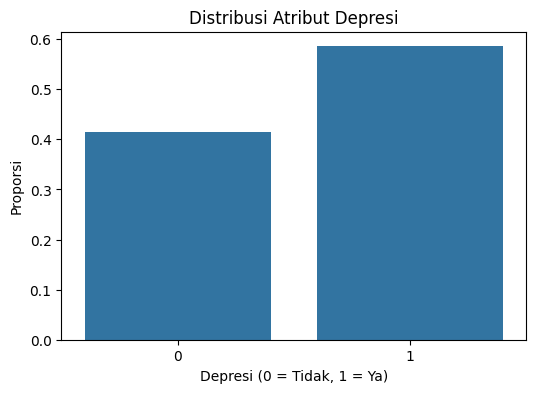

In [15]:
depression_counts = df['Depression'].value_counts(normalize=True).reset_index()
depression_counts.columns = ['Depression', 'Proportion']

plt.figure(figsize=(6, 4))
sns.barplot(x='Depression', y='Proportion', data=depression_counts)
plt.title('Distribusi Atribut Depresi')
plt.xlabel('Depresi (0 = Tidak, 1 = Ya)')
plt.ylabel('Proporsi')
plt.xticks([0, 1])
plt.show()

## - Data Numerical

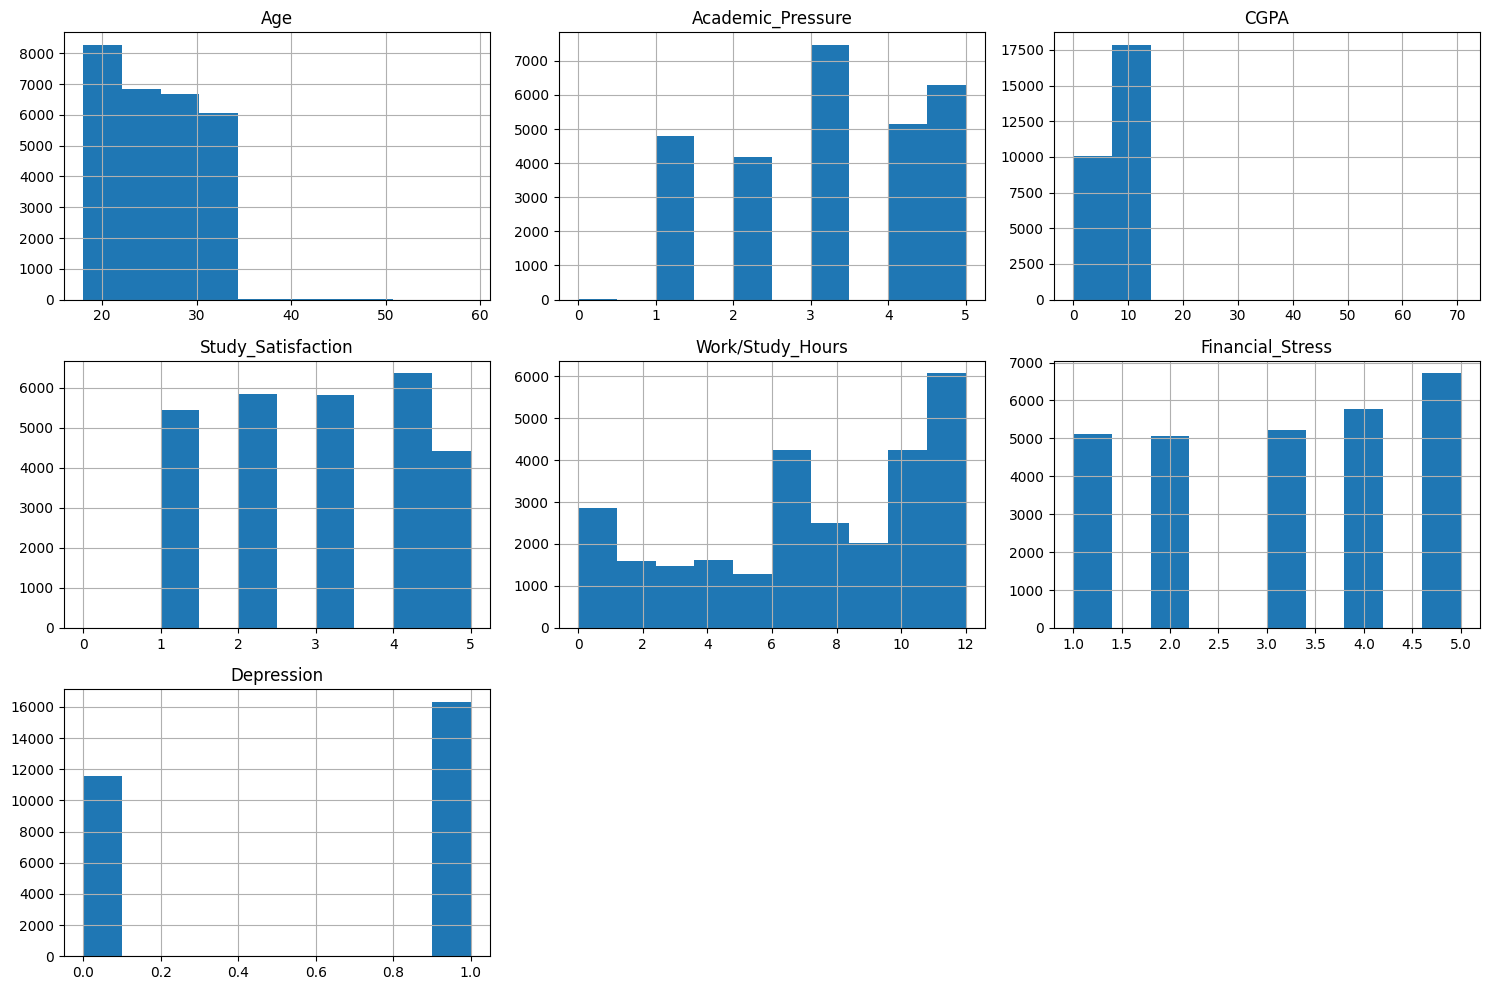

In [16]:
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

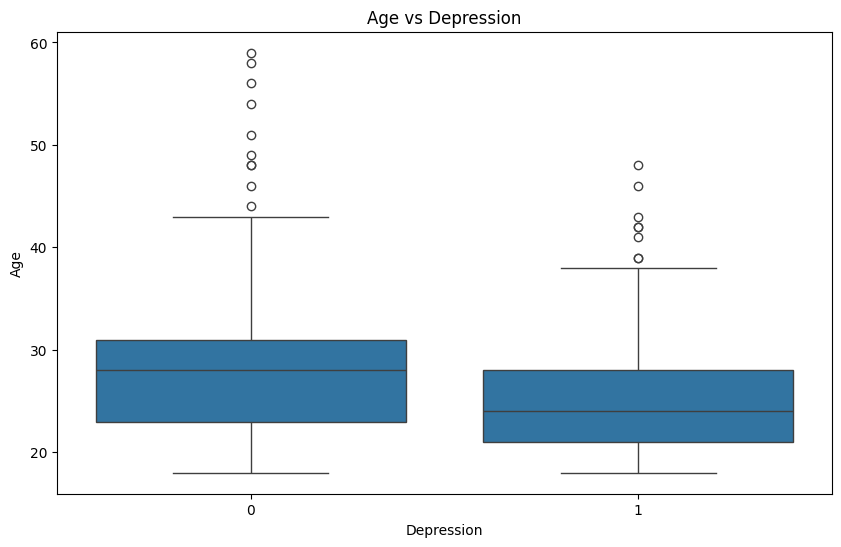

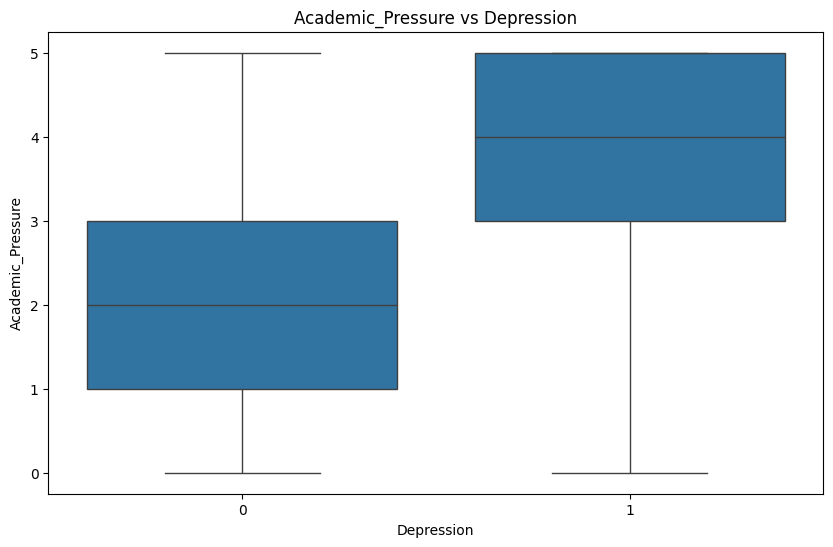

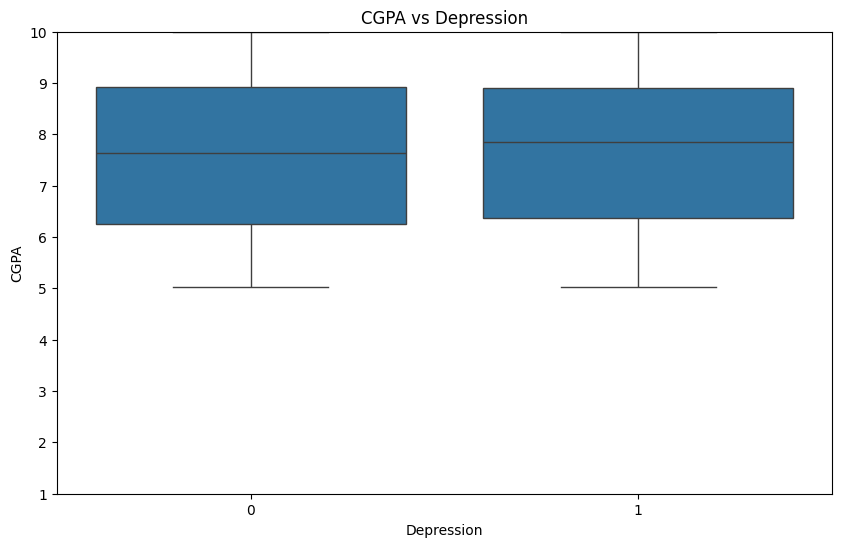

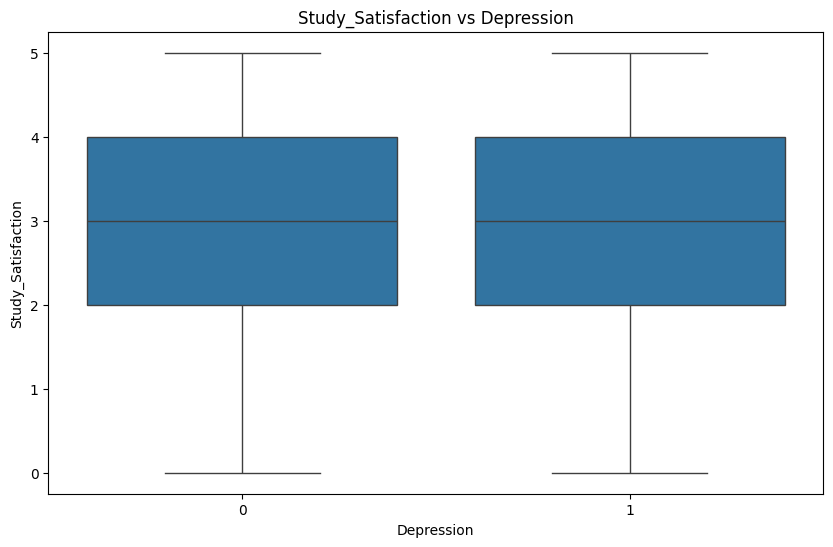

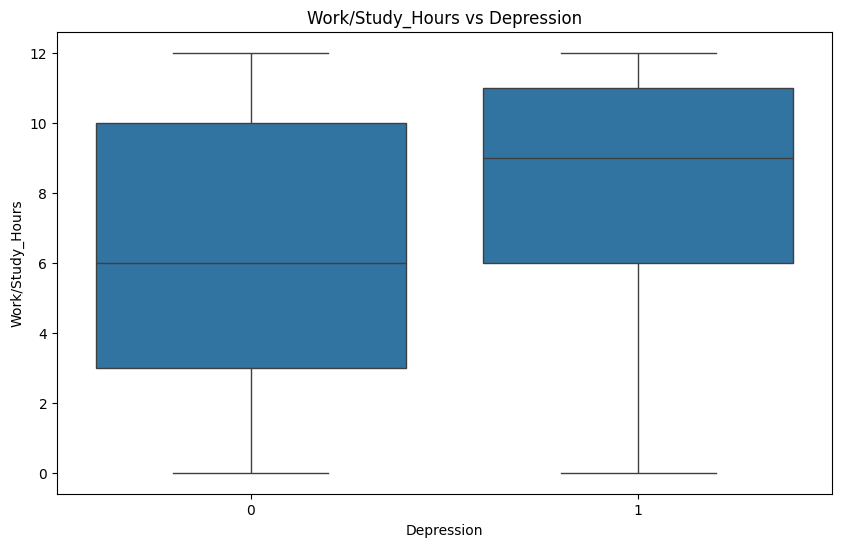

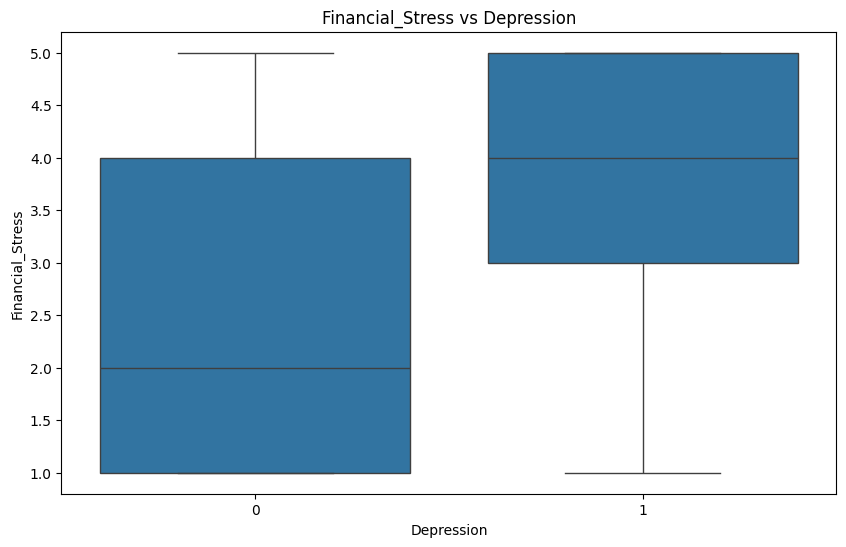

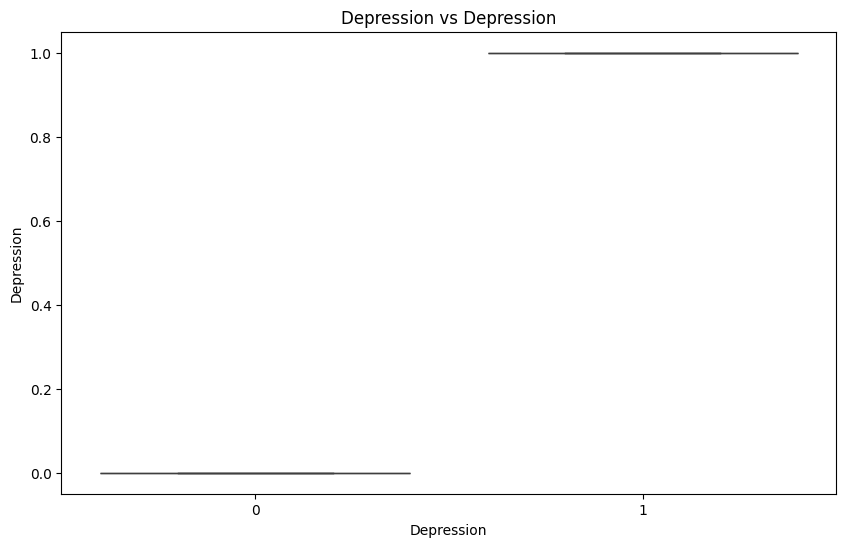

In [17]:
numeric_features = df.select_dtypes(include=[np.number]).columns

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Depression', y=feature, data=df)
    plt.title(f'{feature} vs Depression')
    if feature == 'CGPA':
        plt.ylim(1.0, 10.0)
    plt.show()

## - Data Kategorikal

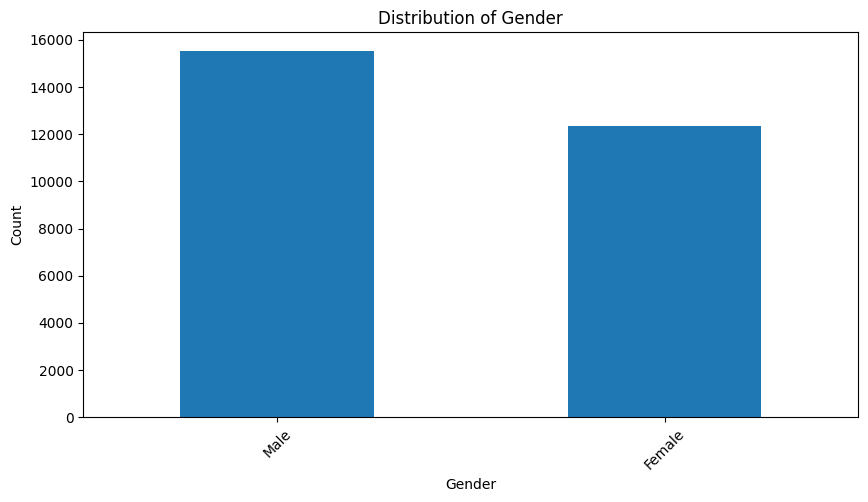

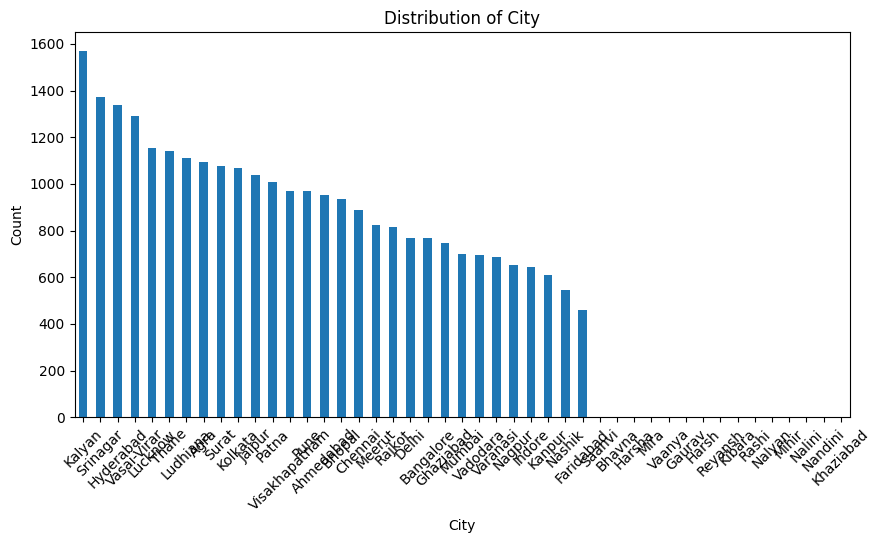

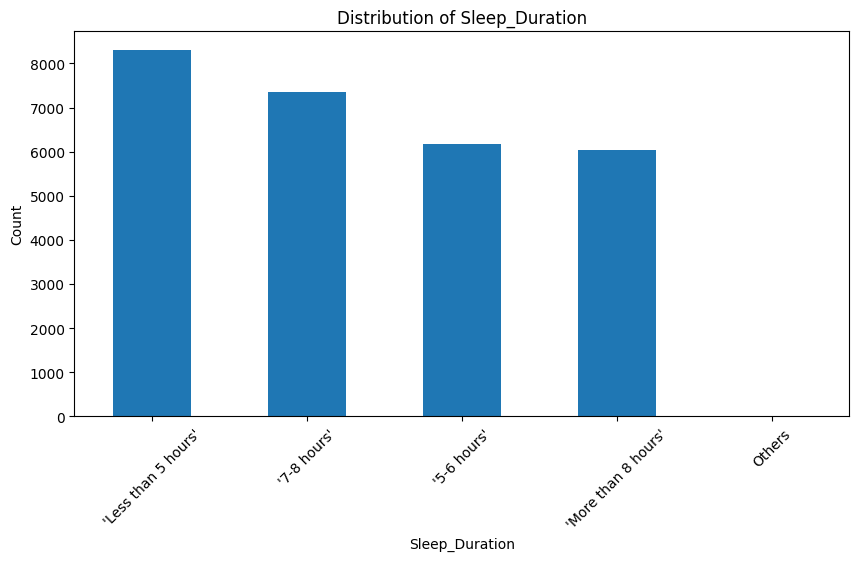

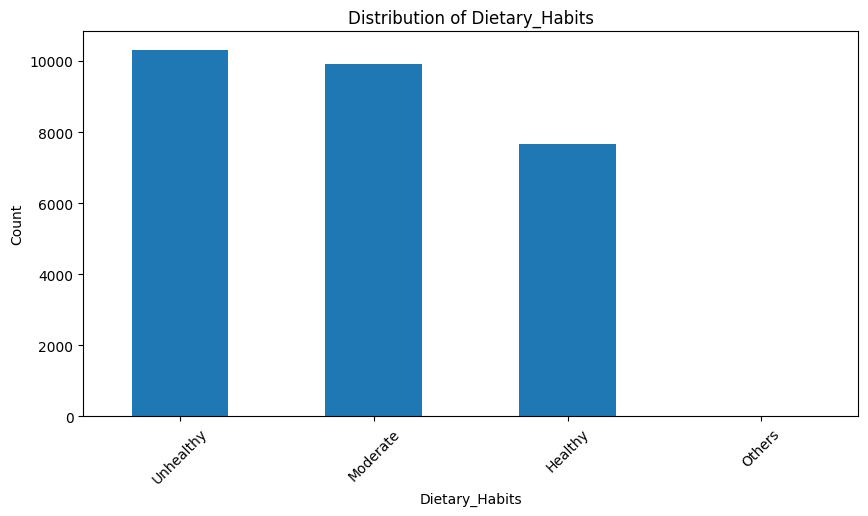

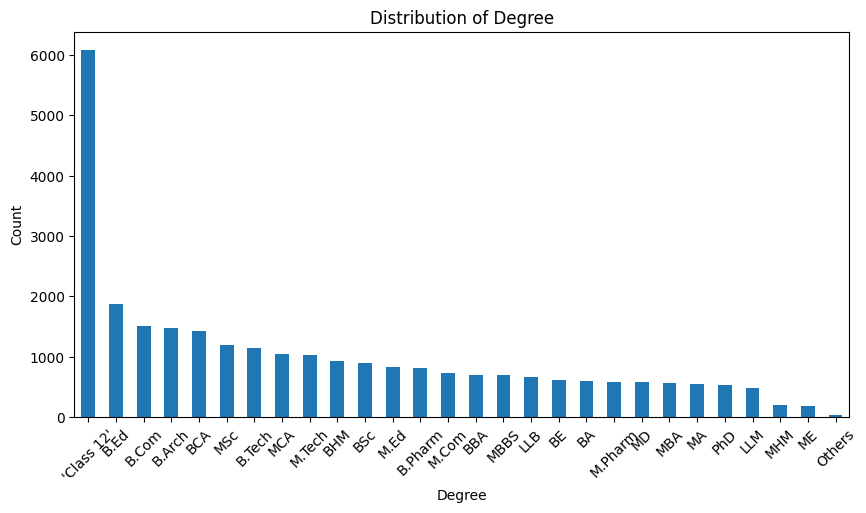

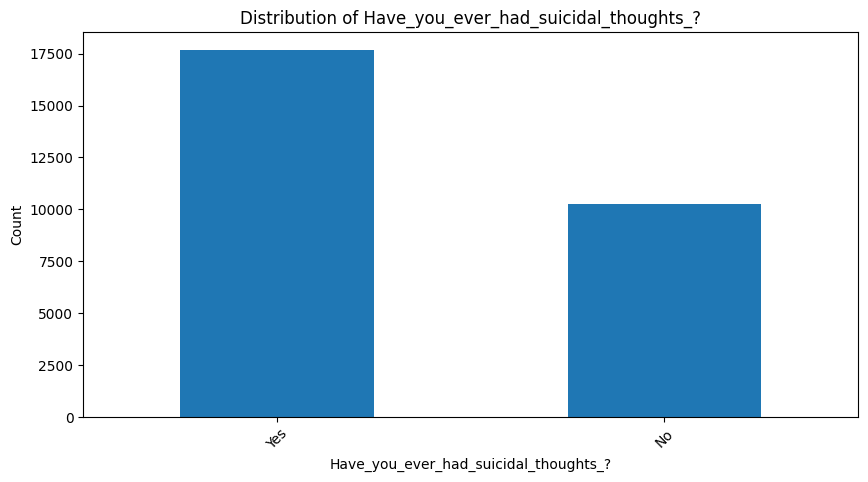

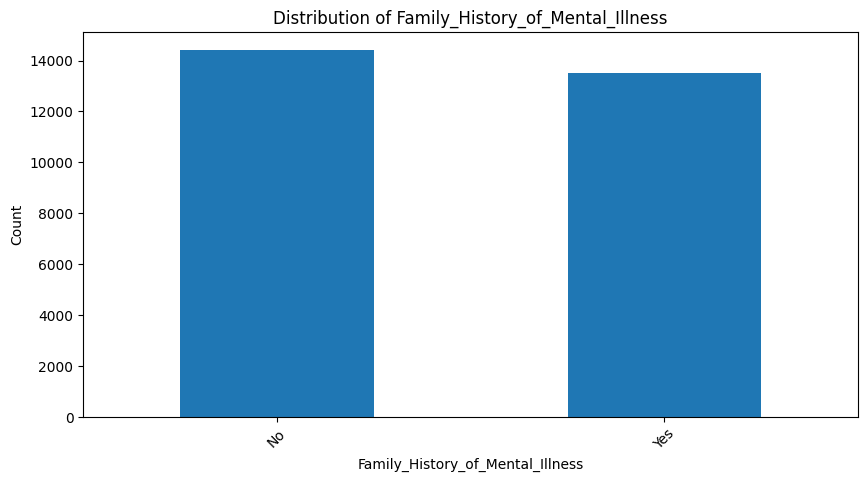

In [18]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

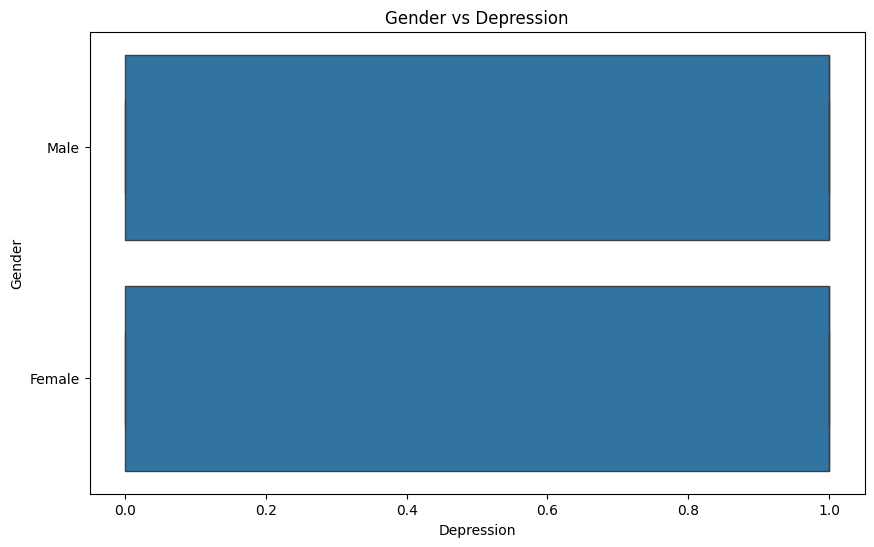

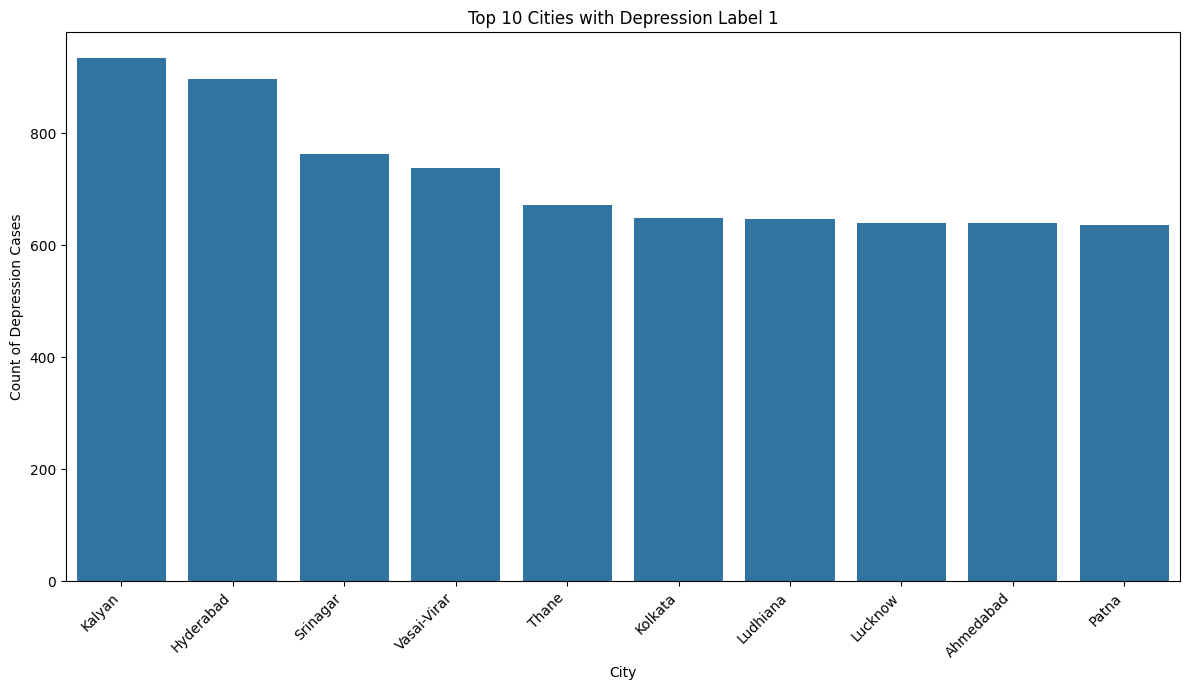

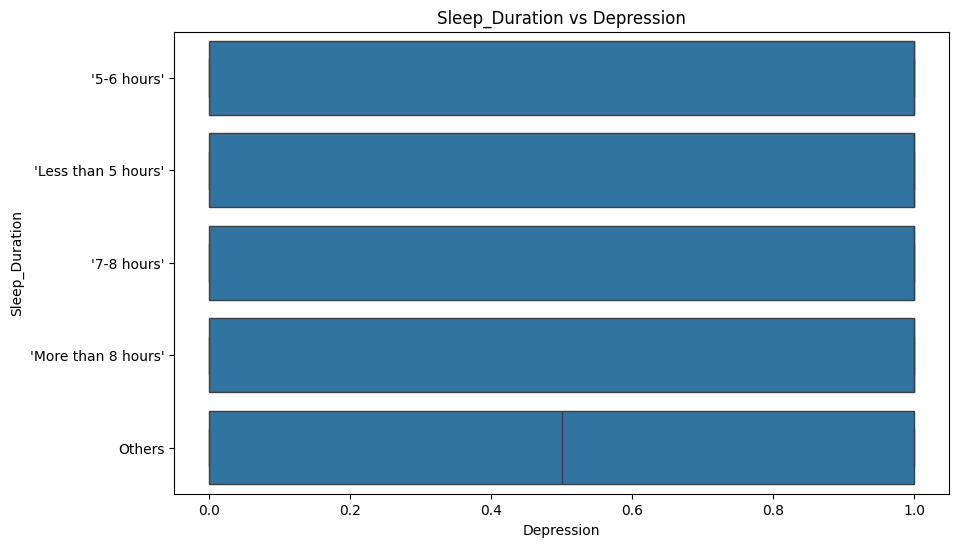

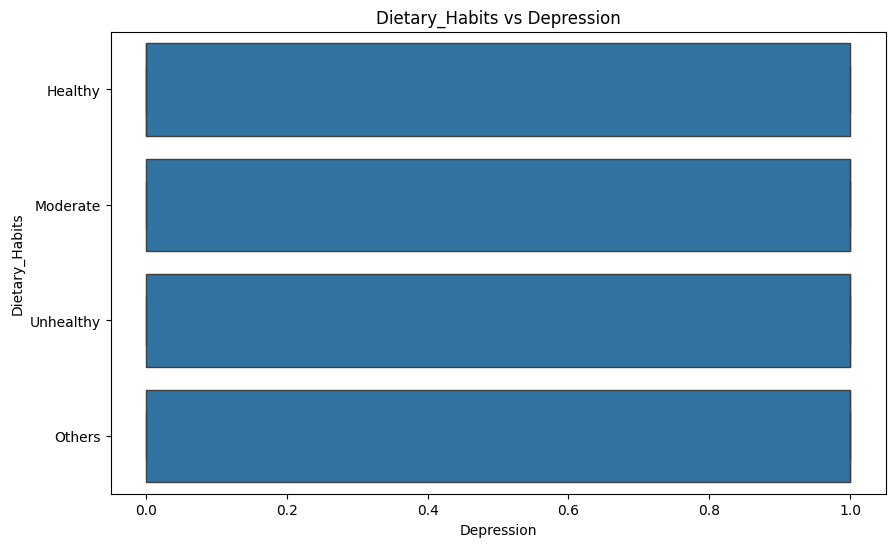

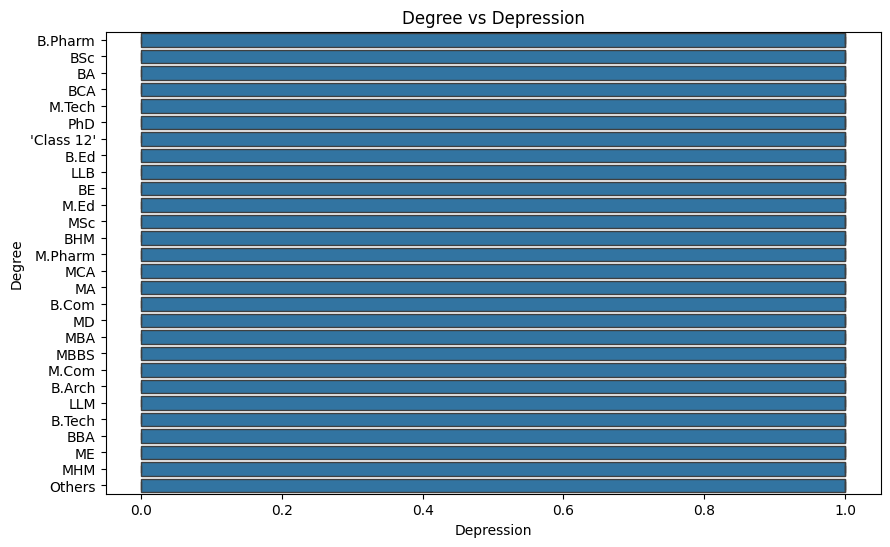

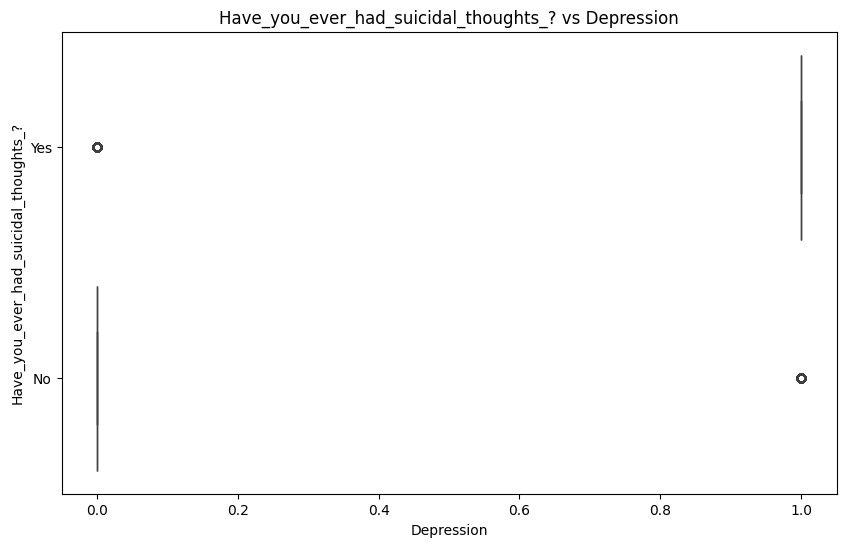

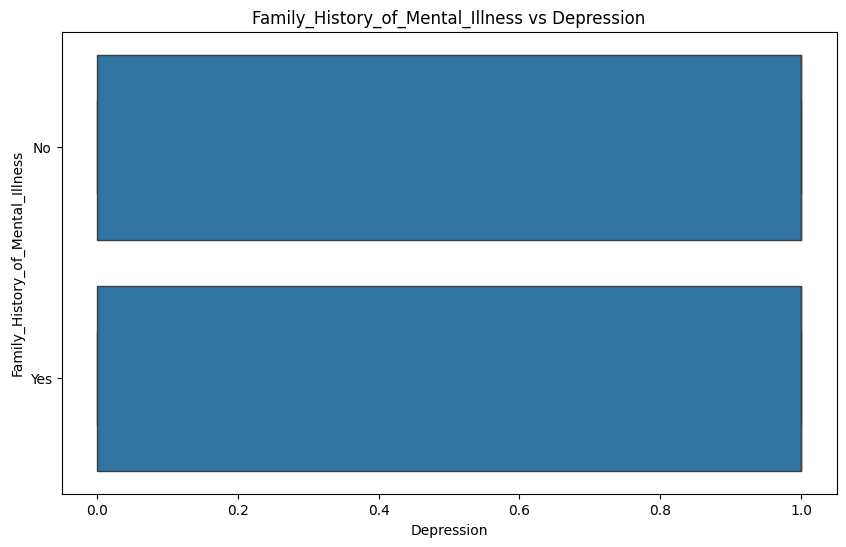

In [19]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    if feature == 'City':
        depressed_cities = df[df['Depression'] == 1]['City'].value_counts().nlargest(10)
        plt.figure(figsize=(12, 7))
        sns.barplot(x=depressed_cities.index, y=depressed_cities.values)
        plt.title('Top 10 Cities with Depression Label 1')
        plt.xlabel('City')
        plt.ylabel('Count of Depression Cases')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Depression', y=feature, data=df)
        plt.title(f'{feature} vs Depression')
        plt.show()

<Figure size 1800x600 with 0 Axes>

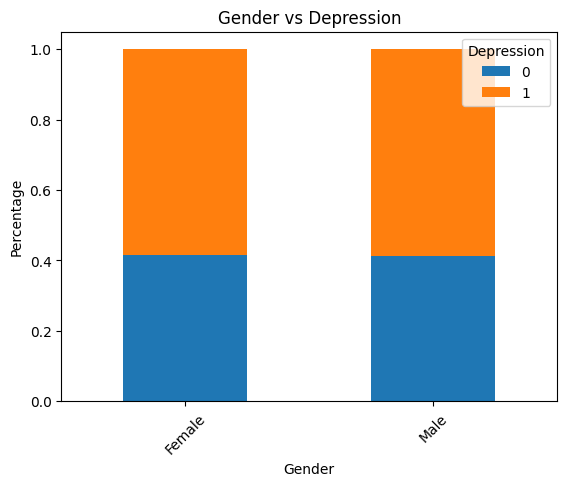

<Figure size 1800x600 with 0 Axes>

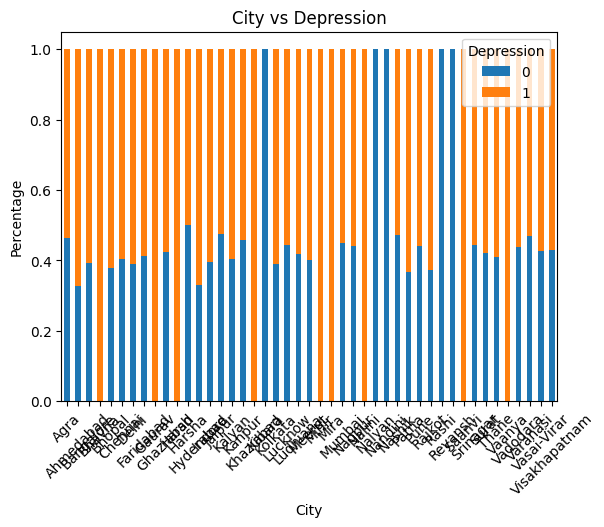

<Figure size 1800x600 with 0 Axes>

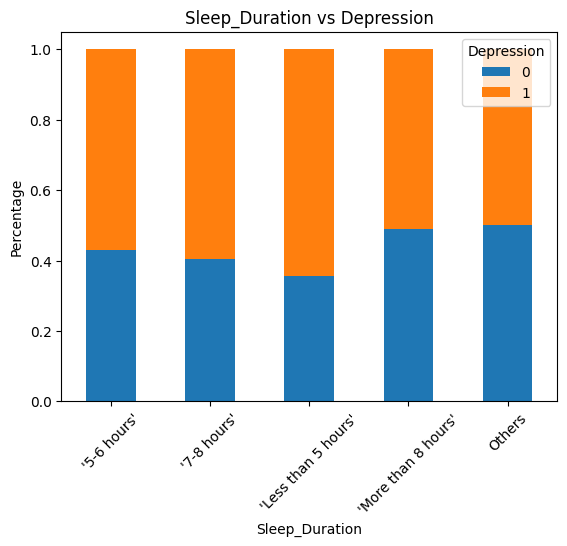

<Figure size 1800x600 with 0 Axes>

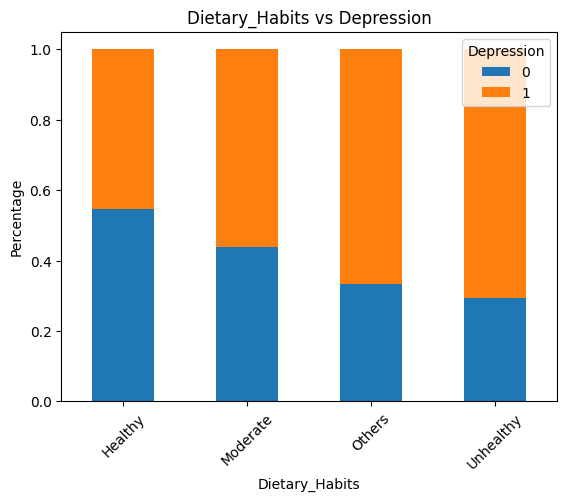

<Figure size 1800x600 with 0 Axes>

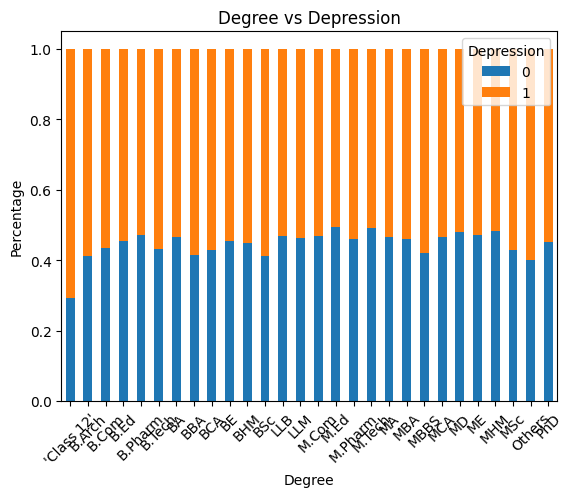

<Figure size 1800x600 with 0 Axes>

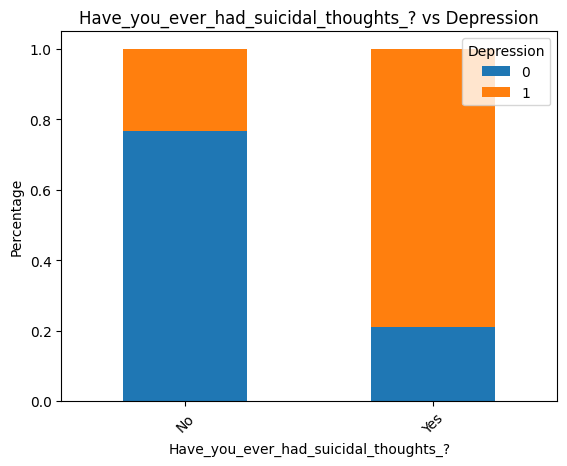

<Figure size 1800x600 with 0 Axes>

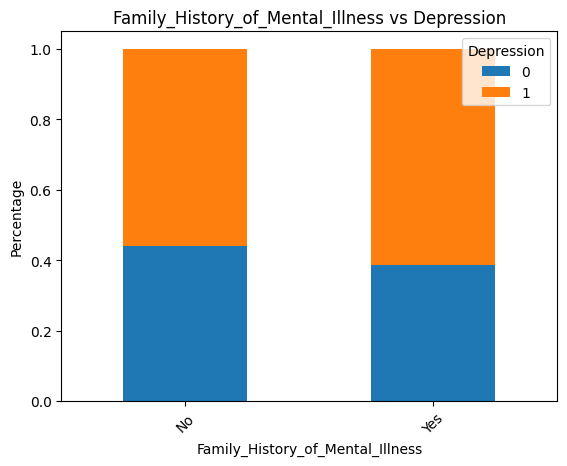

In [20]:
for feature in categorical_features:
    if feature != 'Depression':
        plt.figure(figsize=(18, 6))
        df_temp = df.groupby([feature, 'Depression']).size().unstack()
        df_temp_perc = df_temp.div(df_temp.sum(axis=1), axis=0)
        df_temp_perc.plot(kind='bar', stacked=True)
        plt.title(f'{feature} vs Depression')
        plt.xlabel(feature)
        plt.ylabel('Percentage')
        plt.legend(title='Depression', loc='upper right')
        plt.xticks(rotation=45)
        plt.show()

## Analisa Korelasi

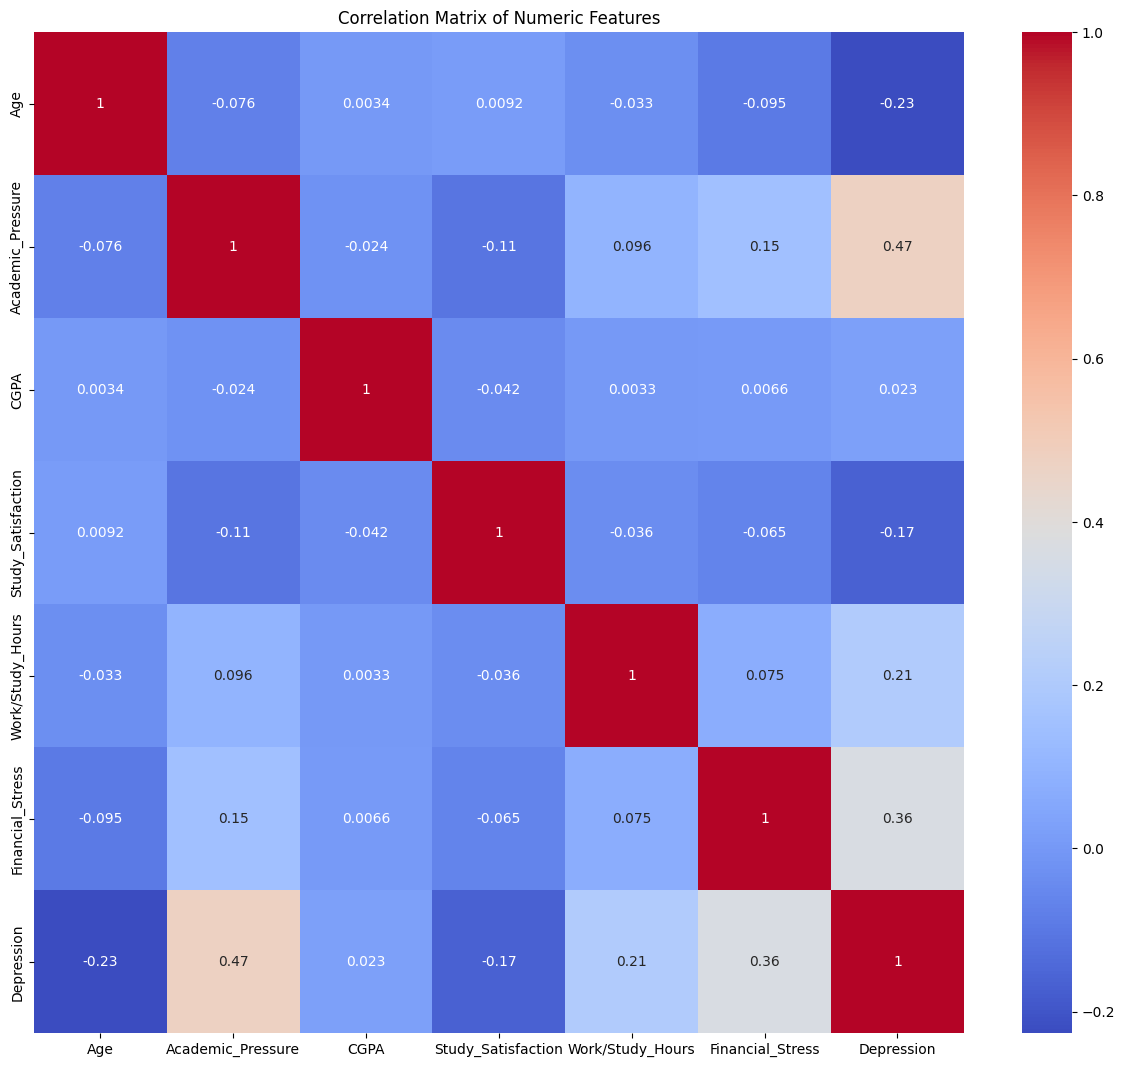

In [21]:
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Identifikasi Outlier

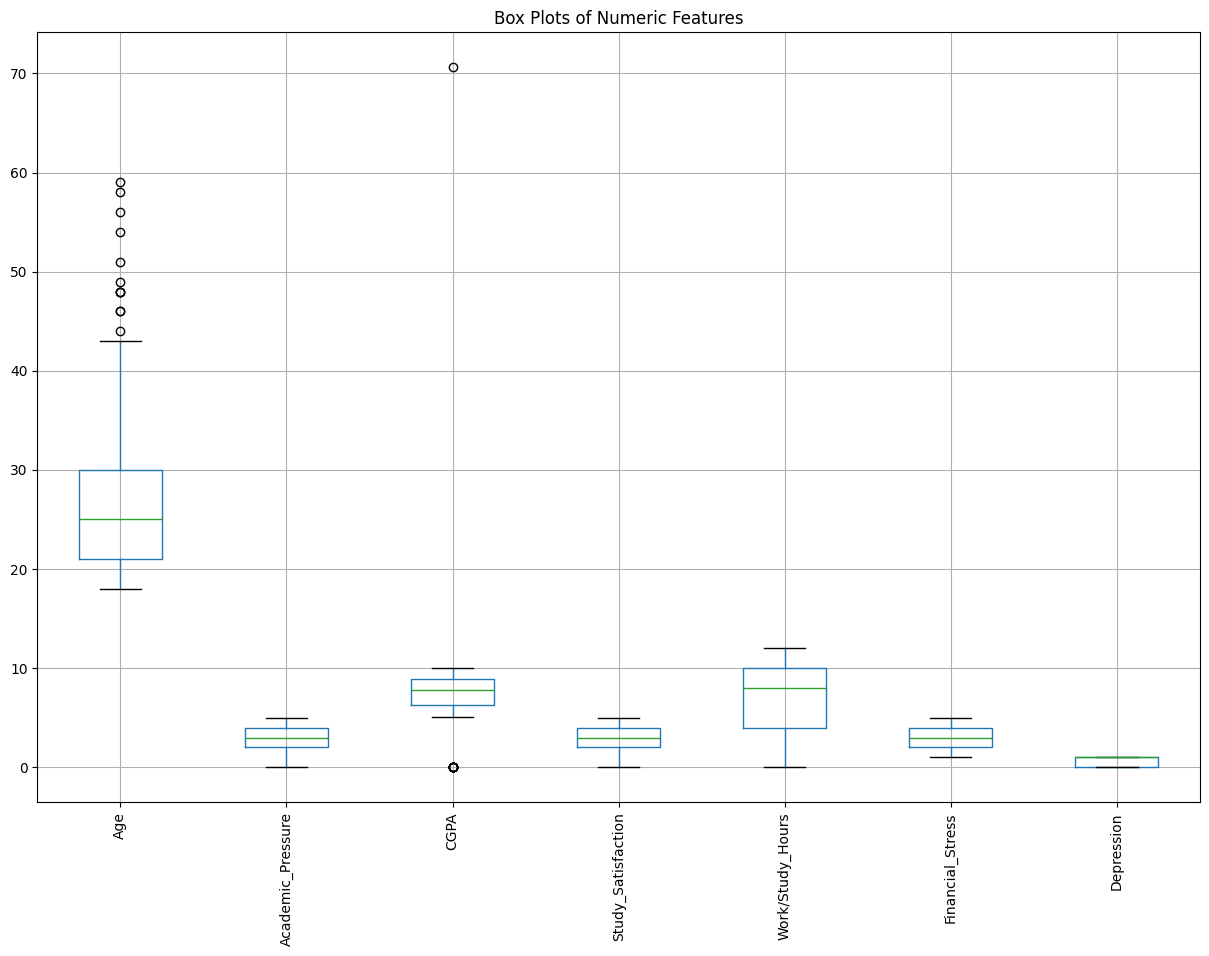

In [22]:
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

## Range Data

In [23]:
print(df.dtypes)

numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Gender                                    object
Age                                      float64
City                                      object
Academic_Pressure                        float64
CGPA                                     float64
Study_Satisfaction                       float64
Sleep_Duration                            object
Dietary_Habits                            object
Degree                                    object
Have_you_ever_had_suicidal_thoughts_?     object
Work/Study_Hours                         float64
Financial_Stress                         float64
Family_History_of_Mental_Illness          object
Depression                                 int64
dtype: object

Nilai non-numerik dalam kolom Financial_Stress:
[nan]


In [24]:
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Age:
Min: 18.0, Max: 59.0

Range nilai untuk Academic_Pressure:
Min: 0.0, Max: 5.0

Range nilai untuk CGPA:
Min: 0.0, Max: 70.625

Range nilai untuk Study_Satisfaction:
Min: 0.0, Max: 5.0

Range nilai untuk Work/Study_Hours:
Min: 0.0, Max: 12.0

Range nilai untuk Financial_Stress:
Min: 1.0, Max: 5.0

Range nilai untuk Depression:
Min: 0, Max: 1

Kategori unik dalam Gender:
['Male' 'Female']

Kategori unik dalam City:
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'Bhavna' 'Mira' 'Harsha' 'Vaanya' 'Gaurav'
 'Harsh' 'Reyansh' 'Kibara' 'Rashi' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']

Kategori unik dalam Sleep_Duration:
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Other

# *PREPROCESSING DATA*

## Missing Value

In [25]:
missing_values = df.isnull().sum()
missing_percentage = 100 * df.isnull().sum() / len(df)
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                                       Total   Percent
Gender                                     0  0.000000
Age                                        0  0.000000
City                                       0  0.000000
Academic_Pressure                          0  0.000000
CGPA                                       0  0.000000
Study_Satisfaction                         0  0.000000
Sleep_Duration                             0  0.000000
Dietary_Habits                             0  0.000000
Degree                                     0  0.000000
Have_you_ever_had_suicidal_thoughts_?      0  0.000000
Work/Study_Hours                           0  0.000000
Financial_Stress                           3  0.010752
Family_History_of_Mental_Illness           0  0.000000
Depression                                 0  0.000000


In [26]:
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Gender                                   0
Age                                      0
City                                     0
Academic_Pressure                        0
CGPA                                     0
Study_Satisfaction                       0
Sleep_Duration                           0
Dietary_Habits                           0
Degree                                   0
Have_you_ever_had_suicidal_thoughts_?    0
Work/Study_Hours                         0
Financial_Stress                         3
Family_History_of_Mental_Illness         0
Depression                               0
dtype: int64

Missing values setelah pembersihan:
Gender                                   0
Age                                      0
City                                     0
Academic_Pressure                        0
CGPA                                     0
Study_Satisfaction                       0
Sleep_Duration                           0
Dietary_Hab

/tmp/ipython-input-1558474934.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/tmp/ipython-input-1558474934.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

## Data Duplikat

In [27]:
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


## Transformasi Data

In [28]:
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Age:
Min: 18.0, Max: 59.0

Range nilai untuk Academic_Pressure:
Min: 0.0, Max: 5.0

Range nilai untuk CGPA:
Min: 0.0, Max: 70.625

Range nilai untuk Study_Satisfaction:
Min: 0.0, Max: 5.0

Range nilai untuk Work/Study_Hours:
Min: 0.0, Max: 12.0

Range nilai untuk Financial_Stress:
Min: 1.0, Max: 5.0

Range nilai untuk Depression:
Min: 0, Max: 1

Kategori unik dalam Gender:
['Male' 'Female']

Kategori unik dalam City:
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'Bhavna' 'Mira' 'Harsha' 'Vaanya' 'Gaurav'
 'Harsh' 'Reyansh' 'Kibara' 'Rashi' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']

Kategori unik dalam Sleep_Duration:
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Other

In [29]:
df = df.rename(columns={'Have_you_ever_had_suicidal_thoughts_?': 'Suicidal_Thoughts'})

In [30]:
Gender = {'Male':1, 'Female':0}
df['Gender'] = df['Gender'].map(Gender)

City ={'Visakhapatnam':1, 'Bangalore':2, 'Srinagar':3, 'Varanasi':4, 'Jaipur':5, 'Pune':6,
 'Thane':6, 'Chennai':7, 'Nagpur':8, 'Vadodara':9, 'Kalyan':10, 'Rajkot':11,
 'Ahmedabad':12, 'Kolkata':13, 'Mumbai':14, 'Lucknow':15, 'Indore':16, 'Surat':17, 'Ludhiana':18,
 'Bhopal':19, 'Meerut':20, 'Agra':21, 'Ghaziabad':22, 'Hyderabad':23, 'Vasai-Virar':24,
 'Kanpur':25, 'Patna':26, 'Faridabad':27, 'Delhi':28, 'Saanvi':29, 'Bhavna':30,
 'Mira':31, 'Harsha':32, 'Vaanya':33, 'Gaurav':34,
 'Harsh':35, 'Reyansh':36, 'Kibara':37, 'Rashi':38, 'Nalyan':39, 'Mihir':40, 'Nalini':41, 'Nandini':42, 'Khaziabad':43}
df['City'] = df['City'].map(City)

Sleep_Duration = {"'Less than 5 hours'":1, "'5-6 hours'":2, "'7-8 hours'":3, "'More than 8 hours'":4, 'Others':5}
df['Sleep_Duration'] = df['Sleep_Duration'].map(Sleep_Duration)

Dietary_Habits = {'Unhealthy':1, 'Moderate':2, 'Healthy':3, 'Others':4}
df['Dietary_Habits'] = df['Dietary_Habits'].map(Dietary_Habits)

Degree = {'B.Pharm':1, 'BSc':2, 'BA':3, 'BCA':4, 'M.Tech':5, 'PhD':6, "'Class 12'":7, 'B.Ed':8, 'LLB':9, 'BE':10,
 'M.Ed':11, 'MSc':12, 'BHM':13, 'M.Pharm':14, 'MCA':15, 'MA':16, 'B.Com':17, 'MD':18, 'MBA':19, 'MBBS':20,
 'M.Com':21, 'B.Arch':22, 'LLM':23, 'B.Tech':24, 'BBA':25, 'ME':26, 'MHM':27, 'Others':28}
df['Degree'] = df['Degree'].map(Degree)

Suicidal_Thoughts = {'No':0, 'Yes':1}
df['Suicidal_Thoughts'] = df['Suicidal_Thoughts'].map(Suicidal_Thoughts)

Family_History_of_Mental_Illness = {'No':0, 'Yes':1}
df['Family_History_of_Mental_Illness'] = df['Family_History_of_Mental_Illness'].map(Family_History_of_Mental_Illness)


In [31]:
df.head()

,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,1,33.0,1.0,5.0,8.97,2.0,2,3,1,1,3.0,1.0,0,1
1,0,24.0,2.0,2.0,5.90,5.0,2,2,2,0,3.0,2.0,1,0
2,1,31.0,3.0,3.0,7.03,5.0,1,3,3,0,9.0,1.0,1,0
3,0,28.0,4.0,3.0,5.59,2.0,3,2,4,1,4.0,5.0,1,1
4,0,25.0,5.0,4.0,8.13,3.0,2,2,5,1,1.0,1.0,0,0


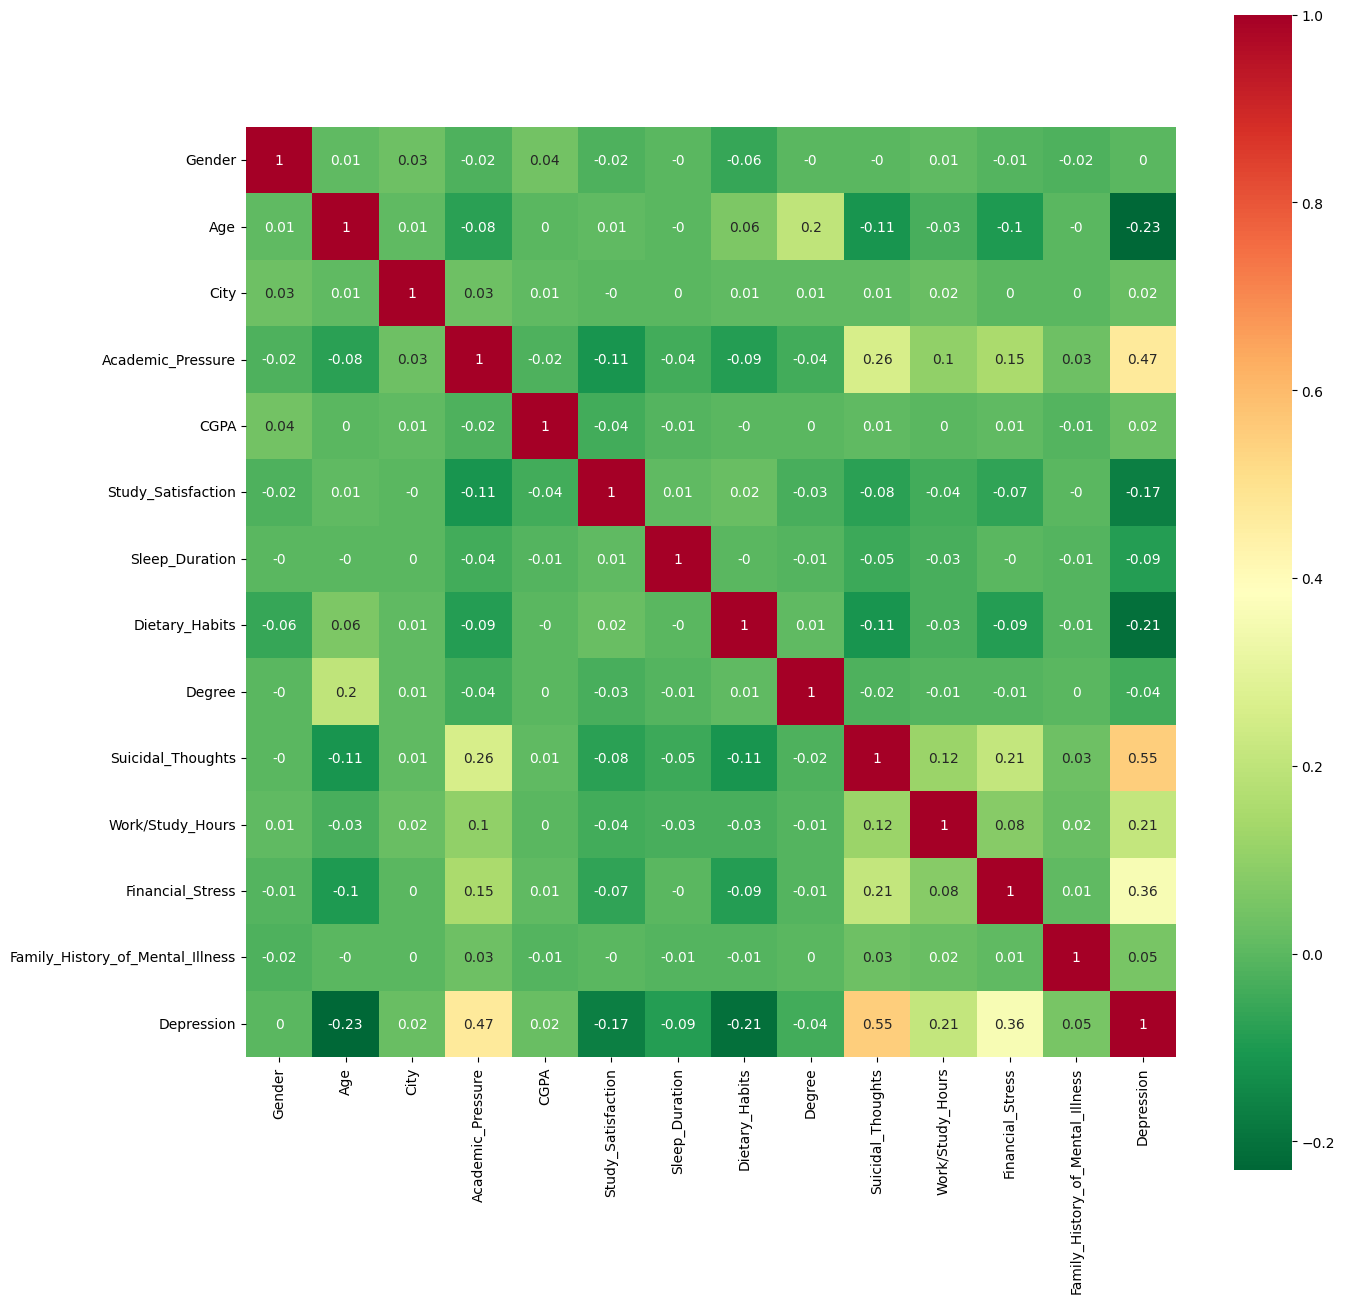

In [32]:
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [33]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [34]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
data_tanpa_fitur = df.drop('Depression', axis=1)

In [36]:
corr_features = correlation(data_tanpa_fitur, 0.8)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  0
set()


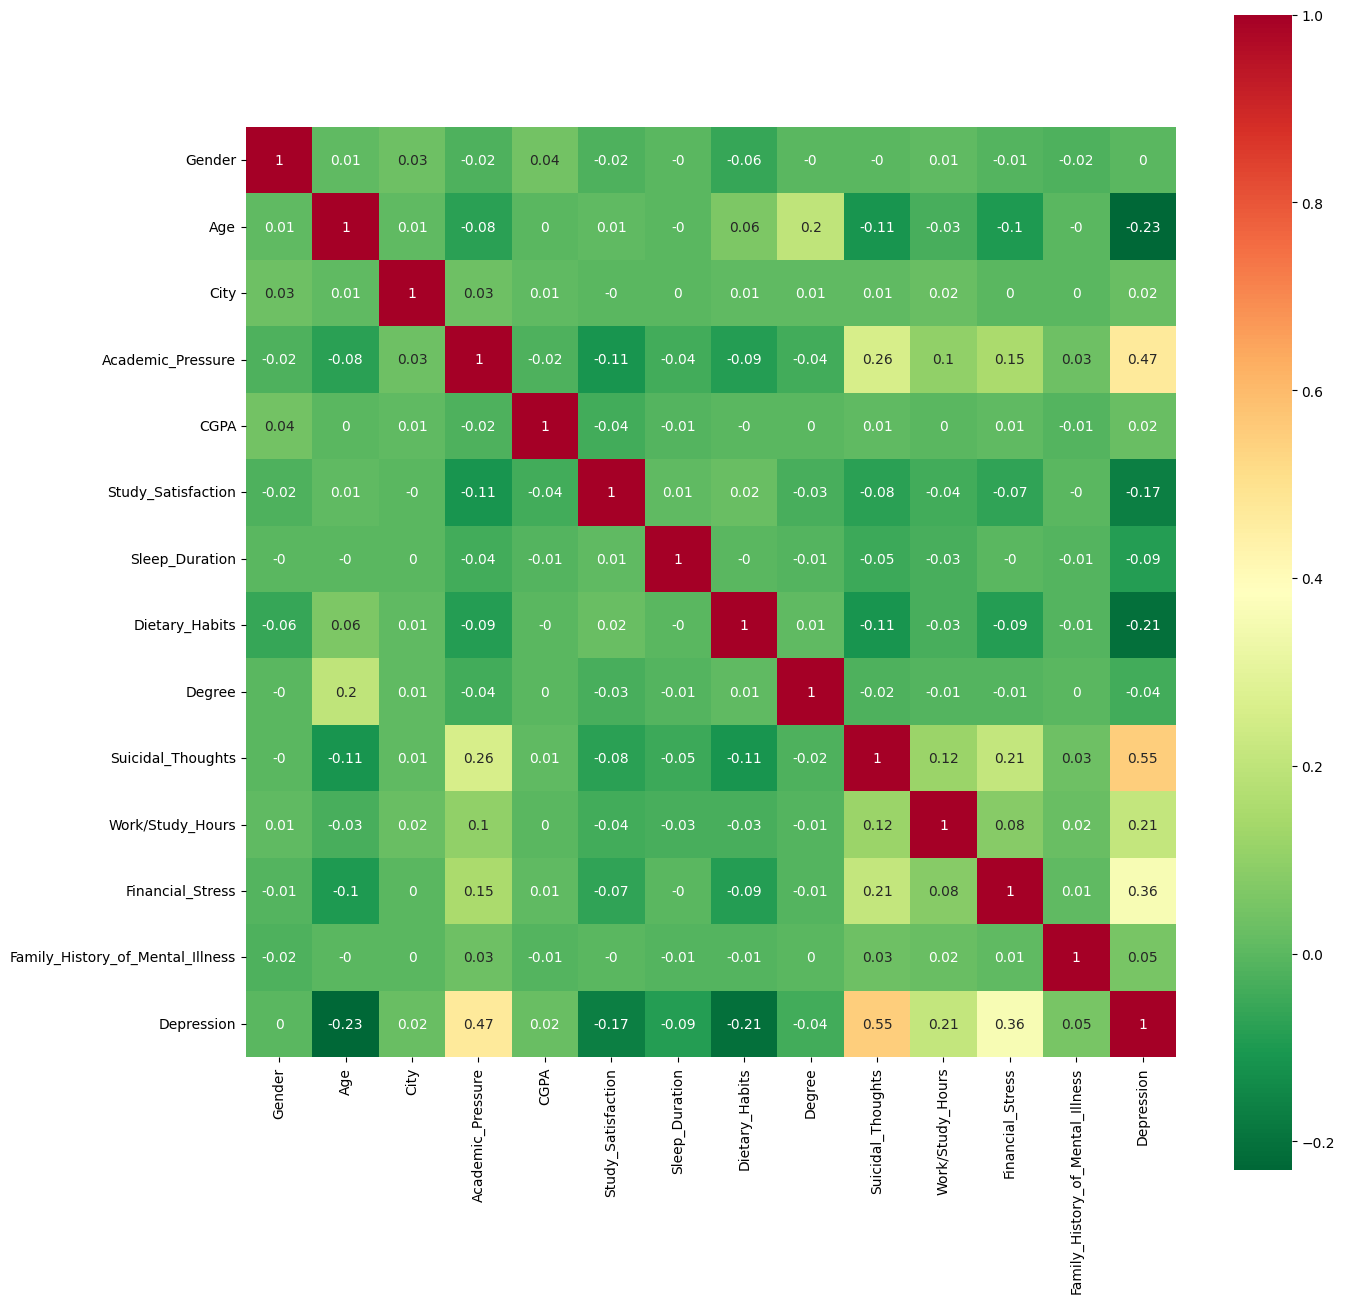

In [37]:
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

#  Membangun Model

## Data Split

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 22320 samples
Testing set size: 5581 samples


## ***RANDOM FOREST***

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid_rf = {
    'n_estimators': (100, 200, 300),
    'max_depth': [4, 5, 6, 7],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': (2, 3, 4, 5),
    'max_features': [None, 'log2', 'sqrt']
}

rf = RandomForestClassifier(random_state=42)

rf_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

rf_search.fit(X_train, y_train)

print("Parameter terbaik untuk Random Forest:")
print(rf_search.best_params_)

best_model_rf = rf_search.best_estimator_

Parameter terbaik untuk Random Forest:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 100}



5. Evaluation...
Accuracy: 0.8366

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


Confusion Matrix:
[[1798  515]
 [ 397 2871]]


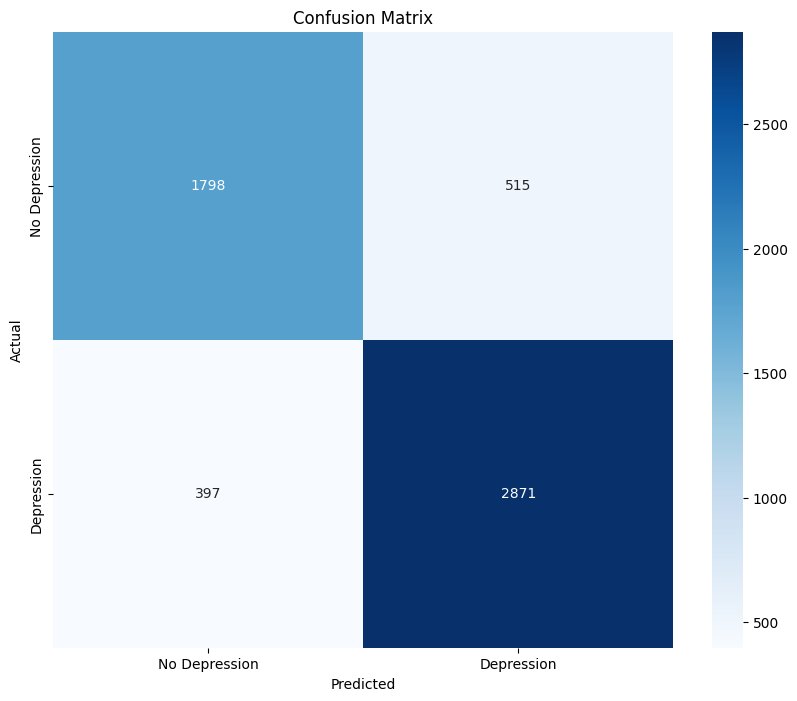

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n5. Evaluation...")

y_pred = best_model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


6. Visualizing the Random Forest...


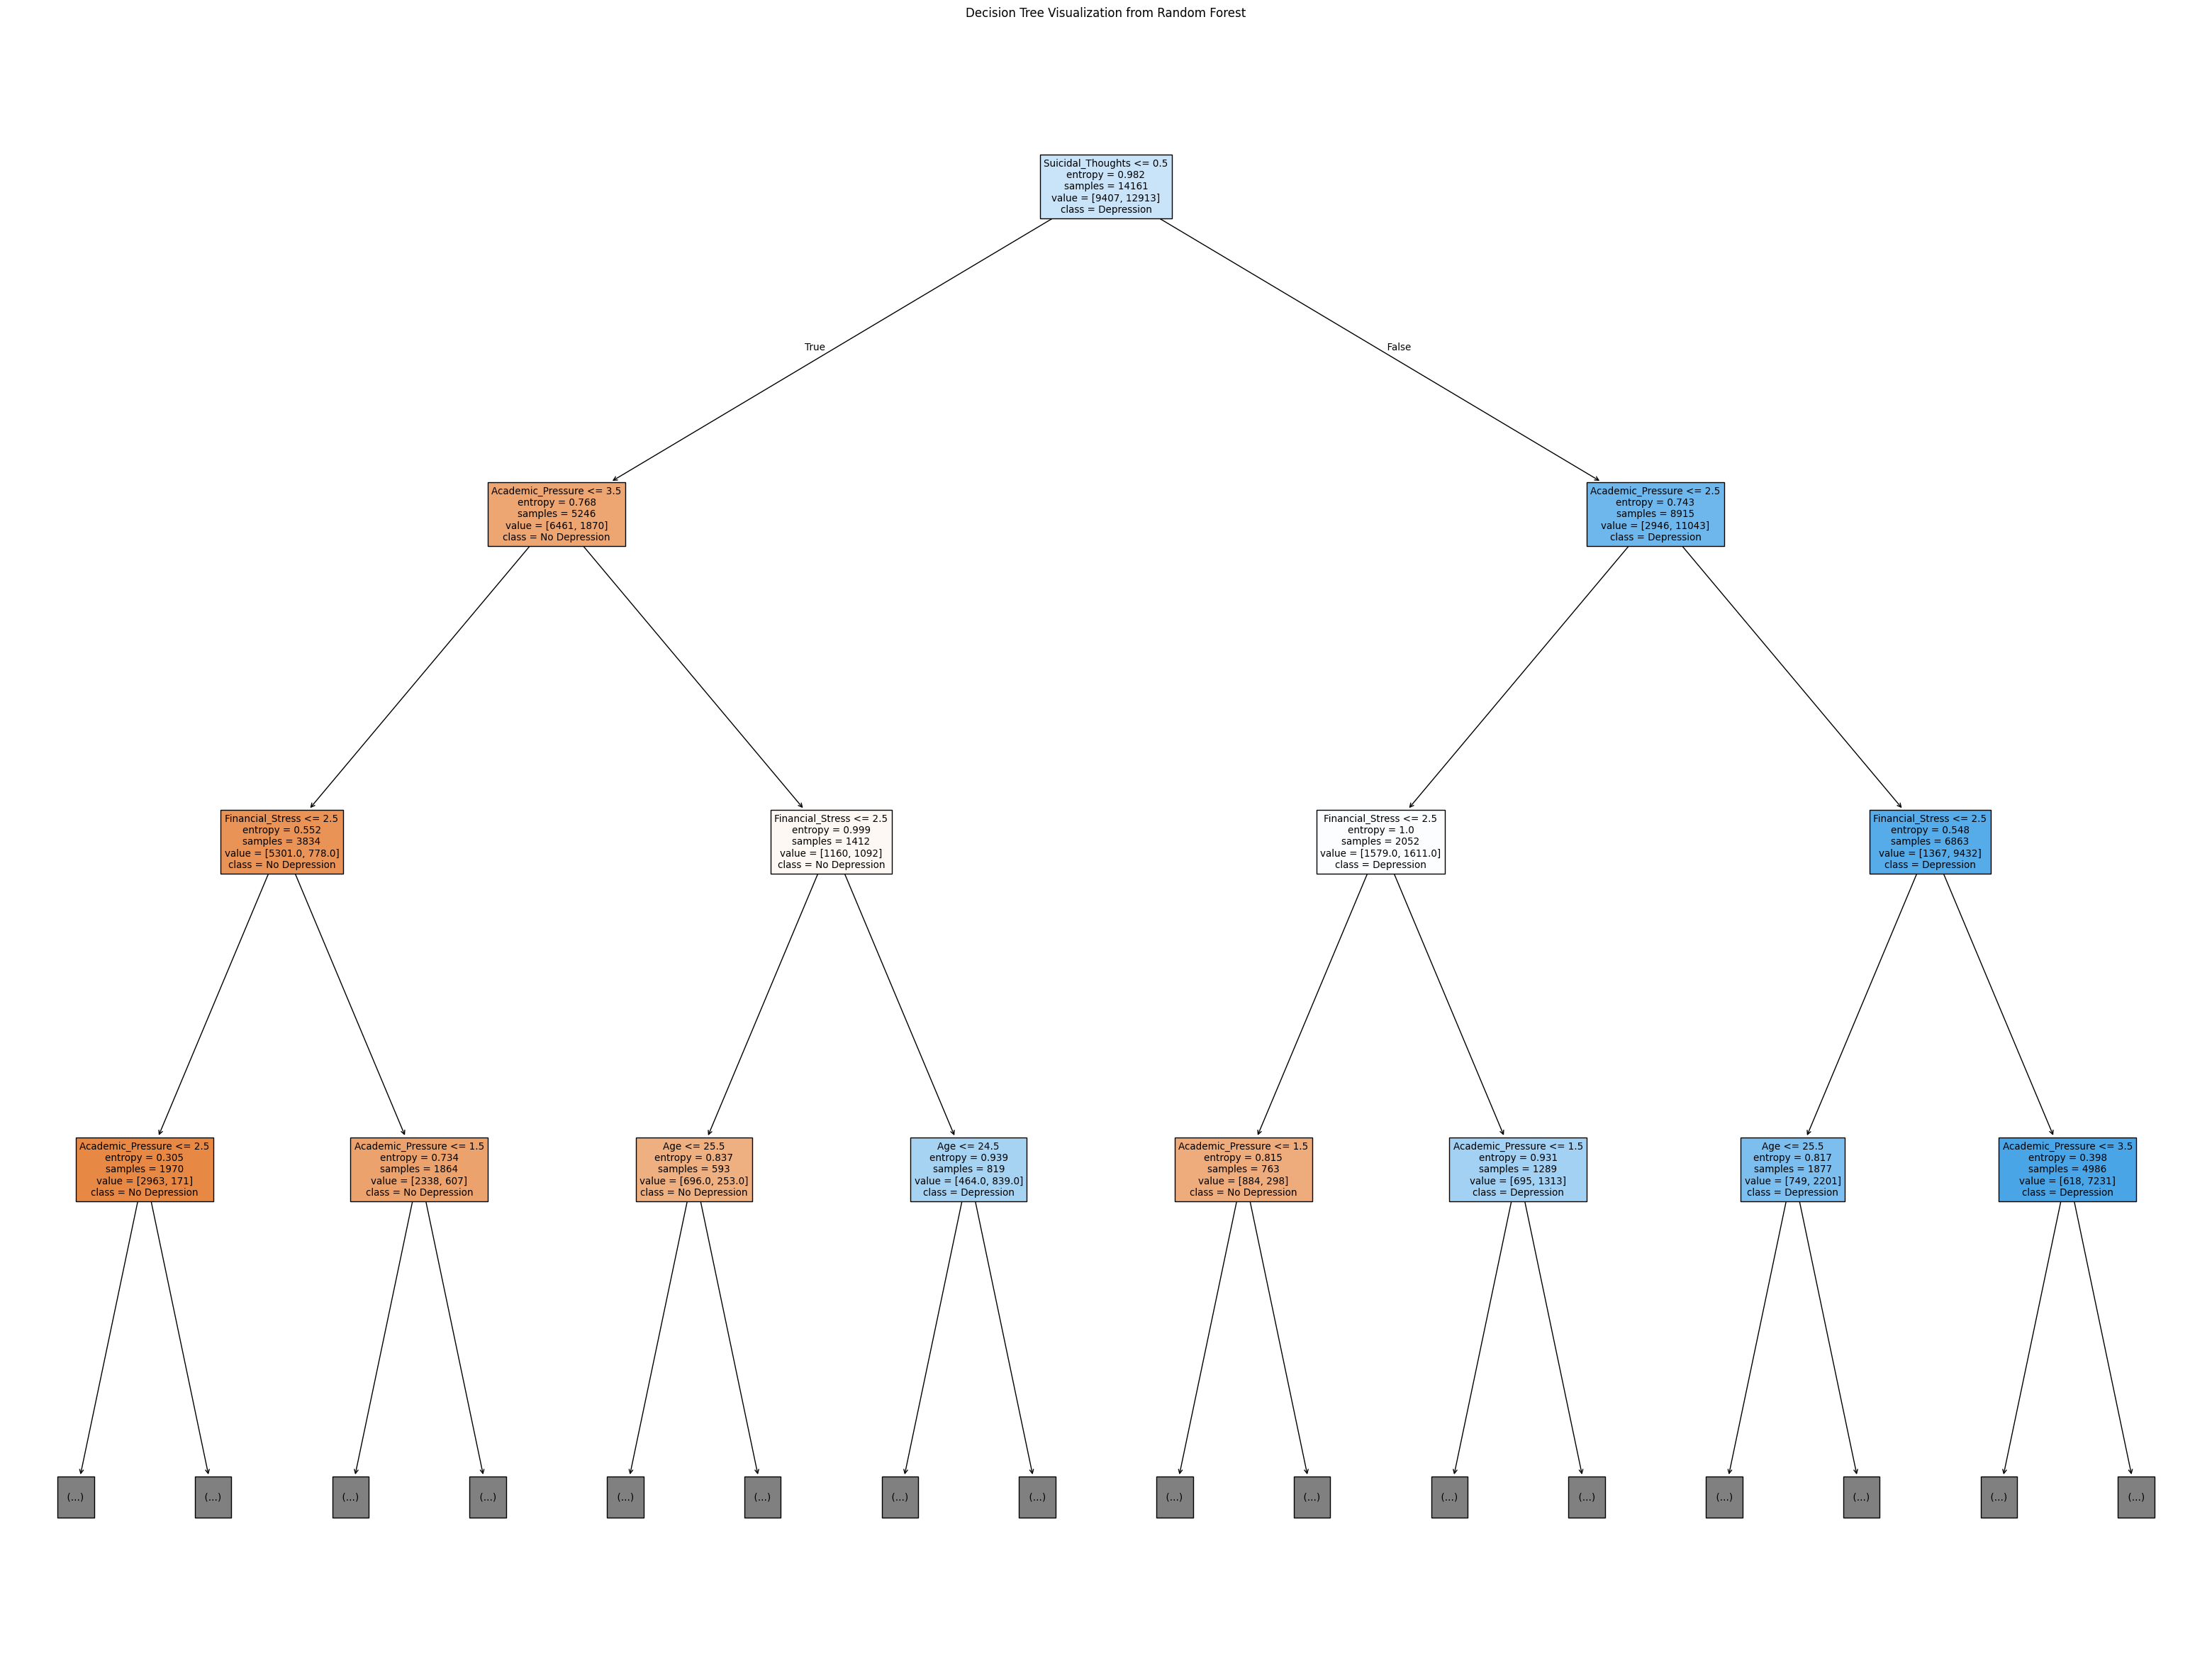

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print("\n6. Visualizing the Random Forest...")

plt.figure(figsize=(40, 30))
plot_tree(best_model_rf.estimators_[0],
          feature_names=X.columns.tolist(),
          class_names=['No Depression', 'Depression'],
          filled=True,
          max_depth=3)
plt.title('Decision Tree Visualization from Random Forest')
plt.show()


7. Feature Importance Analysis...

Numerical Feature Importance:
                             Feature  Importance
9                  Suicidal_Thoughts    0.458892
3                  Academic_Pressure    0.252622
11                  Financial_Stress    0.120272
1                                Age    0.057586
10                  Work/Study_Hours    0.037765
7                     Dietary_Habits    0.027740
5                 Study_Satisfaction    0.014250
4                               CGPA    0.010156
2                               City    0.008795
8                             Degree    0.005445
6                     Sleep_Duration    0.004617
12  Family_History_of_Mental_Illness    0.001192
0                             Gender    0.000667


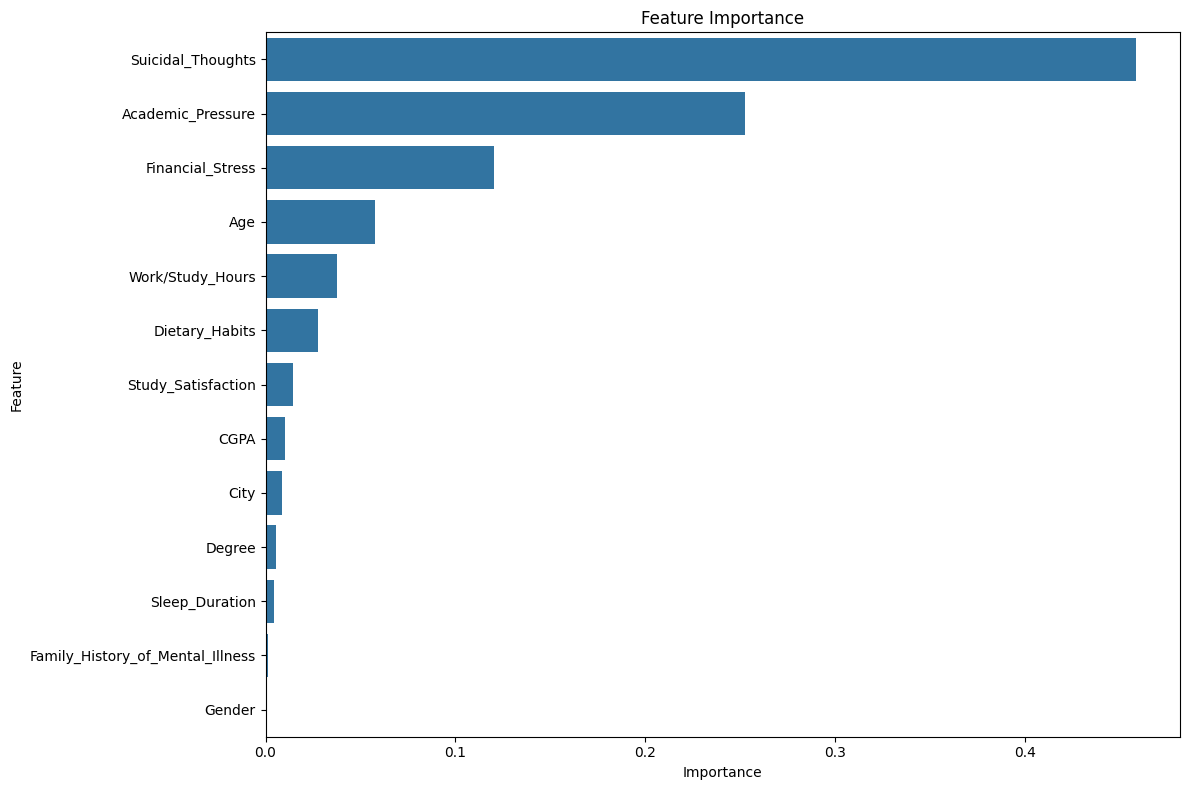

In [43]:
print("\n7. Feature Importance Analysis...")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nNumerical Feature Importance:")
print(feature_importance)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("\n8. Perbandingan Hasil Training dan Testing:")


ori_y_pred_dt_train = best_model_rf.predict(X_train)


ori_accuracy_dt_train = accuracy_score(y_train, ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(y_train, ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(y_train, ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = best_model_rf.predict(X_test)


ori_accuracy_dt_test = accuracy_score(y_test, ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(y_test, ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(y_test, ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)


8. Perbandingan Hasil Training dan Testing:
Akurasi pada training set:  0.8532706093189965
Precision pada training set:  0.8532706093189965
Recall pada training set:  0.8532706093189965
Akurasi pada test set:  0.8365884250134384
Precision pada test set:  0.8365884250134384
Recall pada test set:  0.8365884250134384


## ***XGBOOST***

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.15, 0.5, 0.75, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

xg = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid_xgb,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

print("Memulai GridSearchCV untuk XGBoost")
xgb_search.fit(X_train, y_train)
print("GridSearchCV selesai.")

print("Parameter terbaik untuk XGBoost:")
print(xgb_search.best_params_)

best_model_xgb = xgb_search.best_estimator_

Memulai GridSearchCV untuk XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:57:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV selesai.
Parameter terbaik untuk XGBoost:
{'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.15}



5. Evaluation (XGBoost)...
Accuracy (XGBoost): 0.8452

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.85      0.84      5581


Confusion Matrix (XGBoost):
[[1841  472]
 [ 392 2876]]


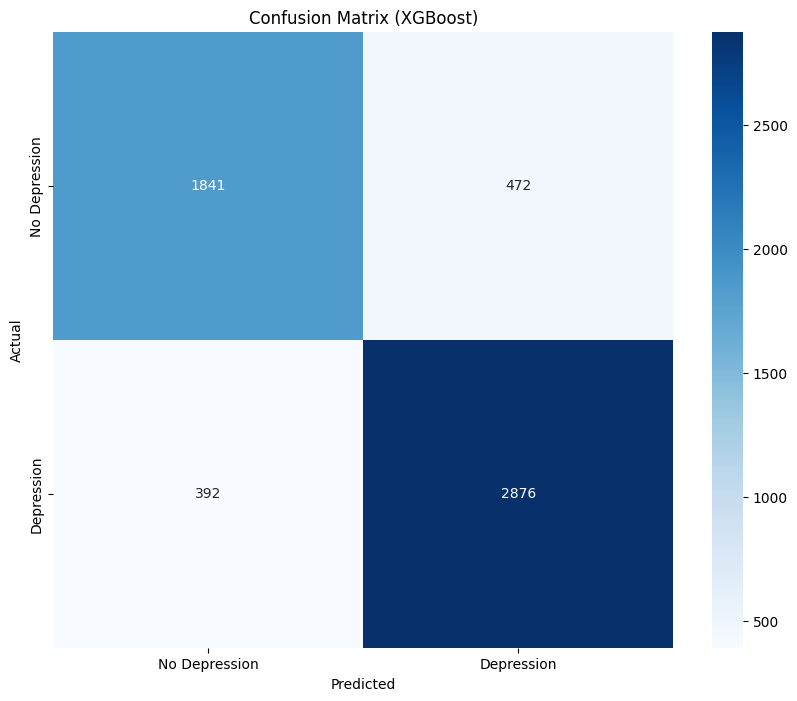

In [46]:
print("\n5. Evaluation (XGBoost)...")


y_pred_xgb = best_model_xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {accuracy_xgb:.4f}")

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix (XGBoost):")
print(cm_xgb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()


6. Visualizing an XGBoost Tree...


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


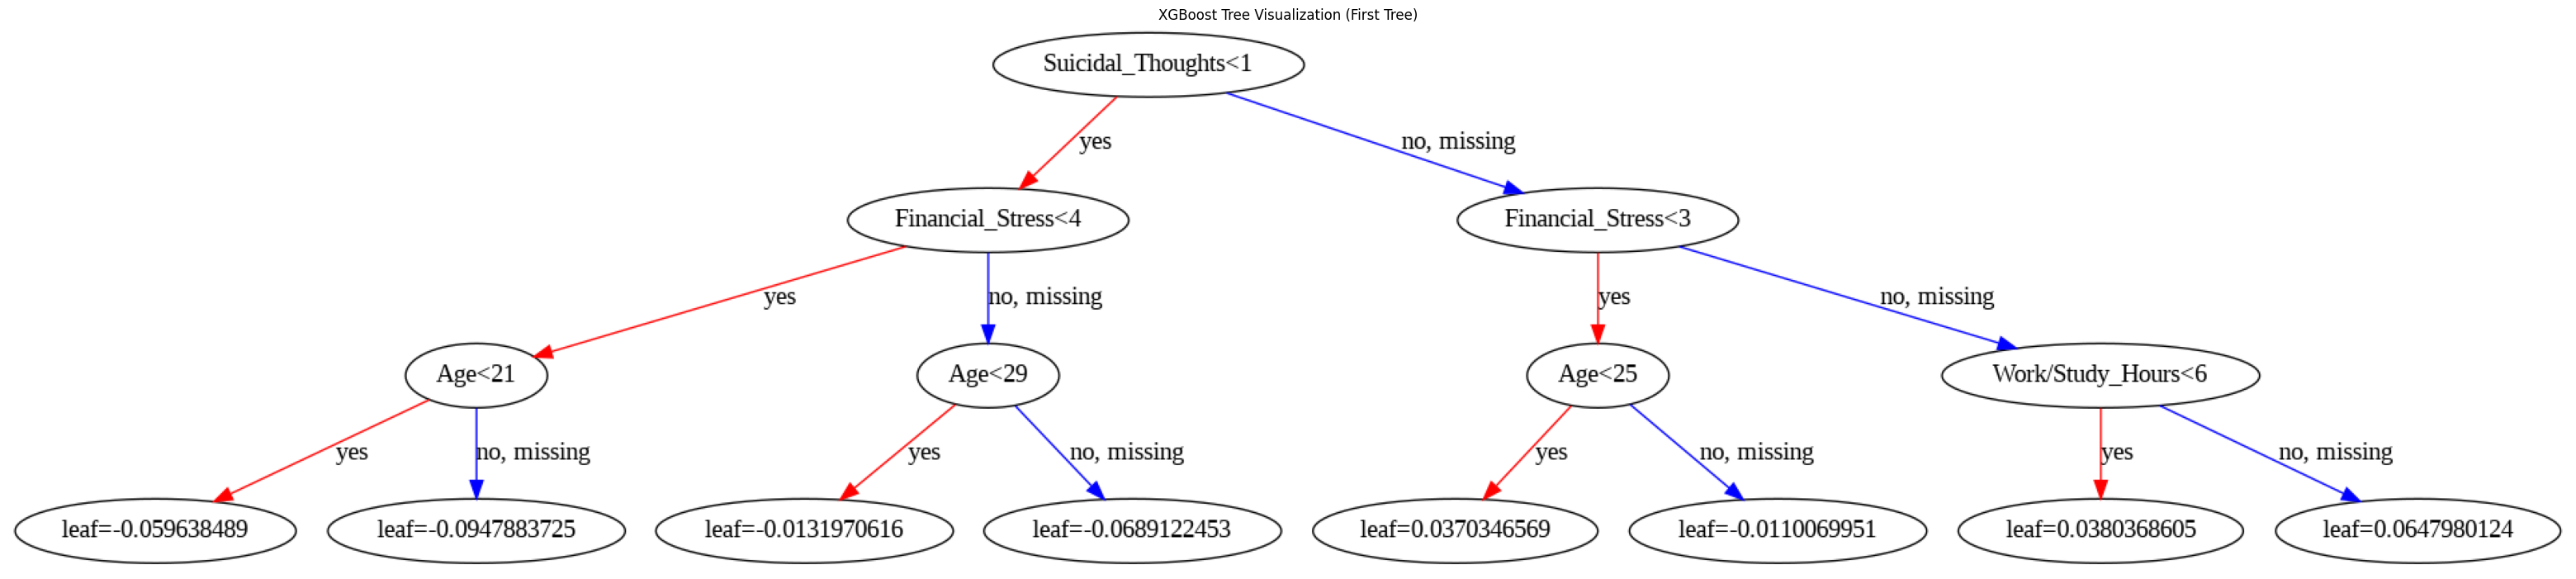

In [47]:
print("\n6. Visualizing an XGBoost Tree...")

plt.figure(figsize=(40, 30))
xgb.plot_tree(best_model_xgb, num_trees=0, rankdir='UT', ax=plt.gca())
plt.title('XGBoost Tree Visualization (First Tree)')
plt.show()


7. Feature Importance Analysis (XGBoost)...

Numerical Feature Importance:
                             Feature  Importance
9                  Suicidal_Thoughts    0.420768
3                  Academic_Pressure    0.152205
11                  Financial_Stress    0.091803
7                     Dietary_Habits    0.052854
1                                Age    0.050110
10                  Work/Study_Hours    0.045233
5                 Study_Satisfaction    0.043950
6                     Sleep_Duration    0.030039
12  Family_History_of_Mental_Illness    0.026646
4                               CGPA    0.023327
2                               City    0.021954
8                             Degree    0.021655
0                             Gender    0.019456


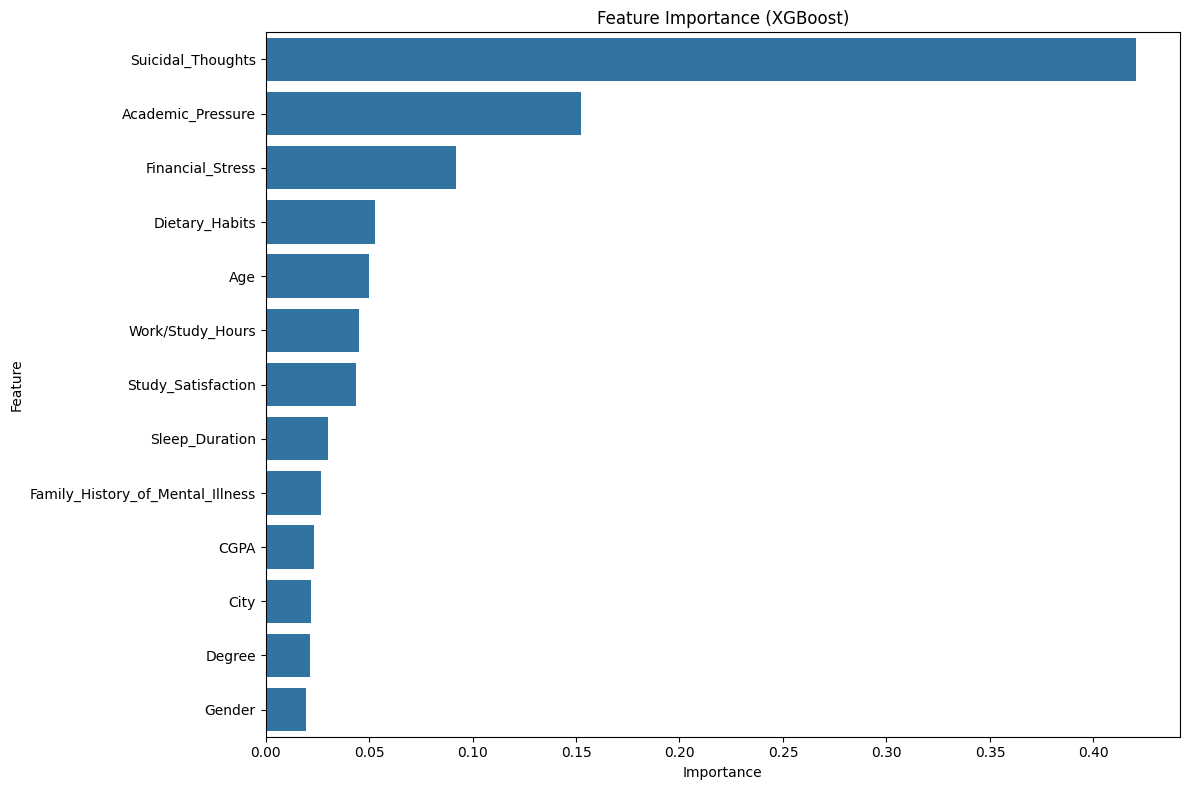

In [48]:
print("\n7. Feature Importance Analysis (XGBoost)...")

feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nNumerical Feature Importance:")
print(feature_importance_xgb)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb)
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("\n8. Perbandingan Hasil Training dan Testing:")


ori_y_pred_dt_train = best_model_xgb.predict(X_train)


ori_accuracy_dt_train = accuracy_score(y_train, ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(y_train, ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(y_train, ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = best_model_xgb.predict(X_test)


ori_accuracy_dt_test = accuracy_score(y_test, ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(y_test, ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(y_test, ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)


8. Perbandingan Hasil Training dan Testing:
Akurasi pada training set:  0.8525537634408602
Precision pada training set:  0.8525537634408602
Recall pada training set:  0.8525537634408602
Akurasi pada test set:  0.8451890342232575
Precision pada test set:  0.8451890342232575
Recall pada test set:  0.8451890342232575


## ***LIGHTGBM***

In [50]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [8, 31, 100],
    'bagging_fraction': [0.15, 0.5, 0.75, 1.0],
    'feature_fraction': [0.7, 0.9, 1.0]
}

lgbm = lgb.LGBMClassifier(random_state=42, bagging_freq=1)
lgbm_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

print("Memulai GridSearchCV untuk LightGBM...")
lgbm_search.fit(X_train, y_train)
print("GridSearchCV selesai.")

print("Parameter terbaik untuk LightGBM:")
print(lgbm_search.best_params_)

best_model_lgbm = lgbm_search.best_estimator_

Memulai GridSearchCV untuk LightGBM...
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 13068, number of negative: 9252
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38


5. Evaluation (LightGBM)...
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
Accuracy (LightGBM): 0.8457

Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581


Confusion Matrix (LightGBM):
[[1838  475]
 [ 386 2882]]


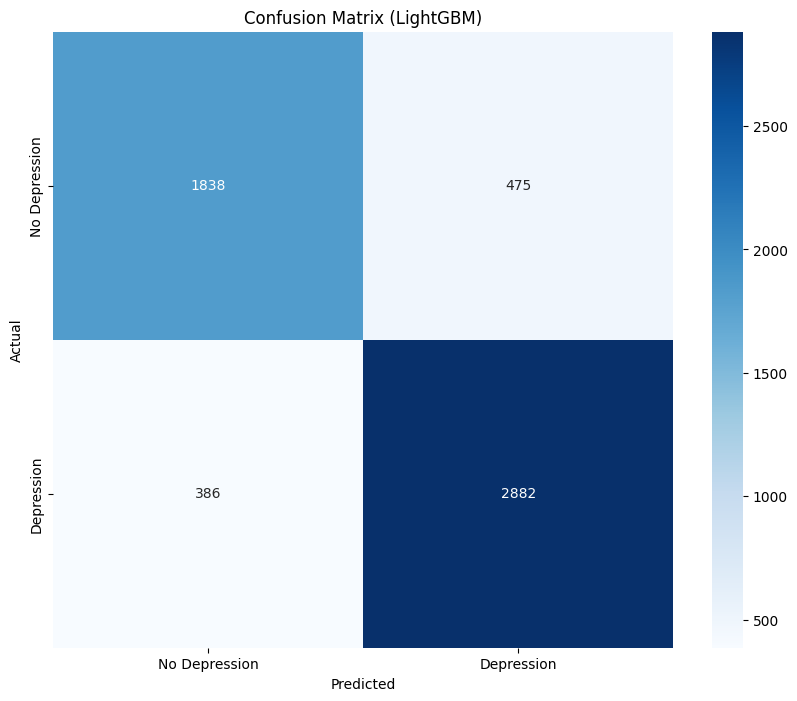

In [51]:
print("\n5. Evaluation (LightGBM)...")

y_pred_lgbm = best_model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy (LightGBM): {accuracy_lgbm:.4f}")

print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgbm))

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print("\nConfusion Matrix (LightGBM):")
print(cm_lgbm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGBM)')
plt.show()


6. Visualizing a LightGBM Tree...


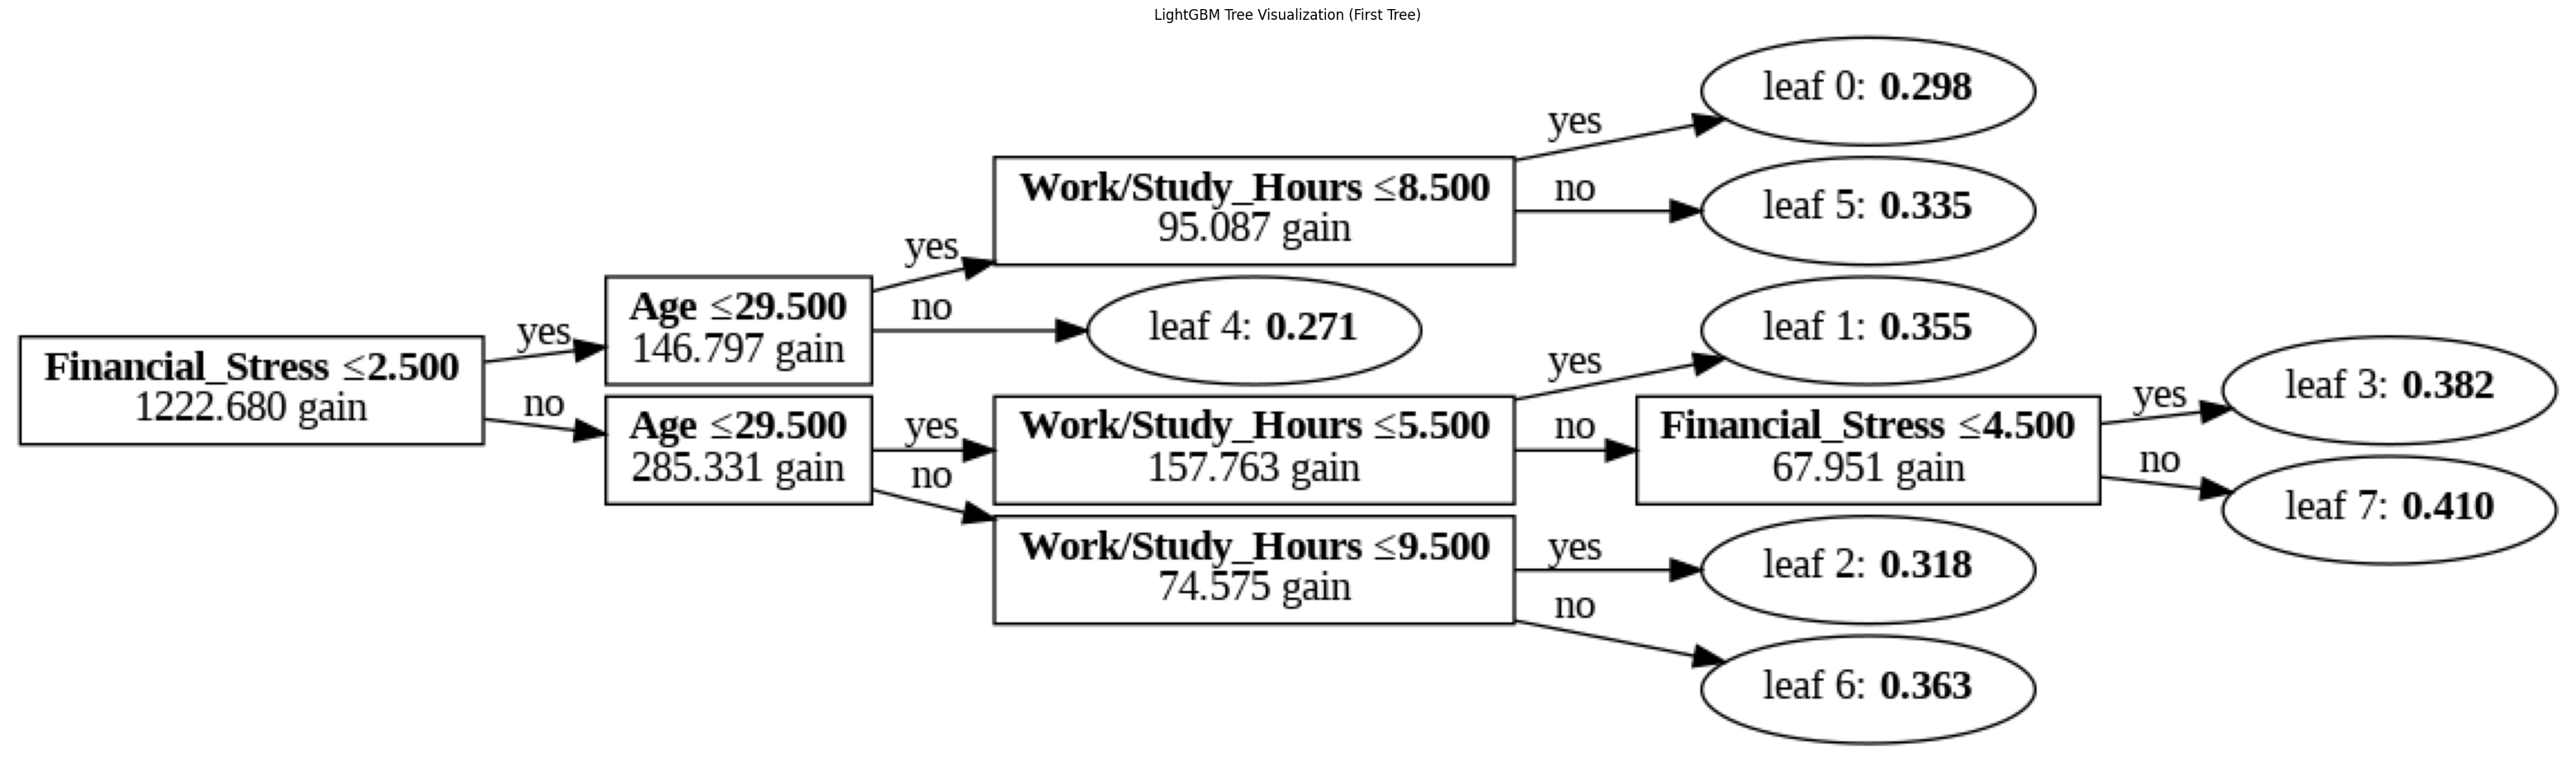

In [52]:
print("\n6. Visualizing a LightGBM Tree...")

plt.figure(figsize=(40, 30))
lgb.plot_tree(best_model_lgbm, tree_index=0, ax=plt.gca(), show_info=['split_gain', 'leaf_val'], precision=3)
plt.title('LightGBM Tree Visualization (First Tree)')
plt.show()


7. Feature Importance Analysis (LightGBM)...

Numerical Feature Importance:
                             Feature  Importance
1                                Age         203
3                  Academic_Pressure         196
11                  Financial_Stress         172
10                  Work/Study_Hours         139
7                     Dietary_Habits         114
5                 Study_Satisfaction         112
9                  Suicidal_Thoughts         111
4                               CGPA         102
2                               City          92
6                     Sleep_Duration          72
8                             Degree          50
12  Family_History_of_Mental_Illness          31
0                             Gender           6


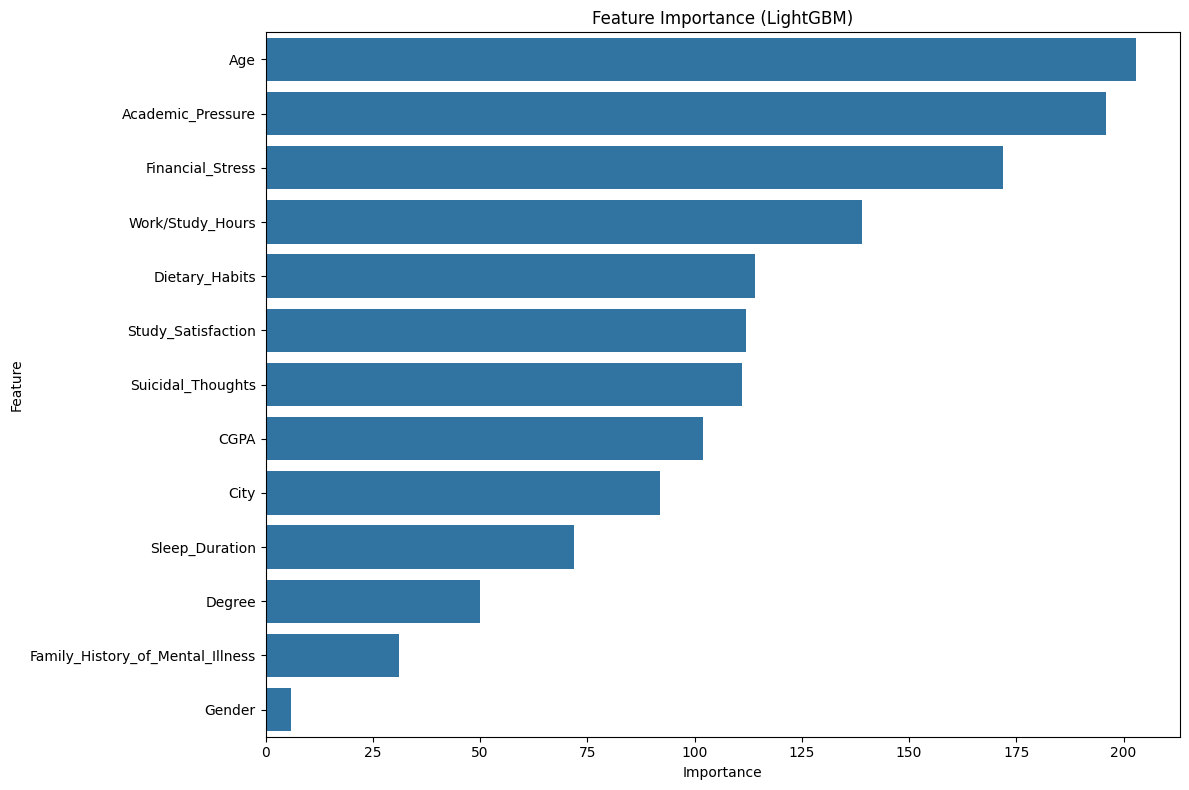

In [53]:
print("\n7. Feature Importance Analysis (LightGBM)...")

feature_importance_lgbm = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model_lgbm.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nNumerical Feature Importance:")
print(feature_importance_lgbm)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_lgbm)
plt.title('Feature Importance (LightGBM)')
plt.tight_layout()
plt.show()

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("\n8. Perbandingan Hasil Training dan Testing:")


ori_y_pred_dt_train = best_model_lgbm.predict(X_train)


ori_accuracy_dt_train = accuracy_score(y_train, ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(y_train, ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(y_train, ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = best_model_lgbm.predict(X_test)


ori_accuracy_dt_test = accuracy_score(y_test, ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(y_test, ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(y_test, ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)


8. Perbandingan Hasil Training dan Testing:
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
Akurasi pada training set:  0.8549283154121864
Precision pada training set:  0.8549283154121864
Recall pada training set:  0.8549283154121864
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
Akurasi pada test set:  0.8457265722988712
Precision pada test set:  0.8457265722988712
Recall pada test set:  0.84

# Hasil Perbandingan

In [55]:
accuracy_comparison = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy': [accuracy, accuracy_xgb, accuracy_lgbm]
}

accuracy_df = pd.DataFrame(accuracy_comparison)

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print("\nHasil Perbandingan Akurasi Model:")
display(accuracy_df)


Hasil Perbandingan Akurasi Model:


,Model,Accuracy
2,LightGBM,0.845727
1,XGBoost,0.845189
0,Random Forest,0.836588


## Visualisasi Kurva ROC AUC

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


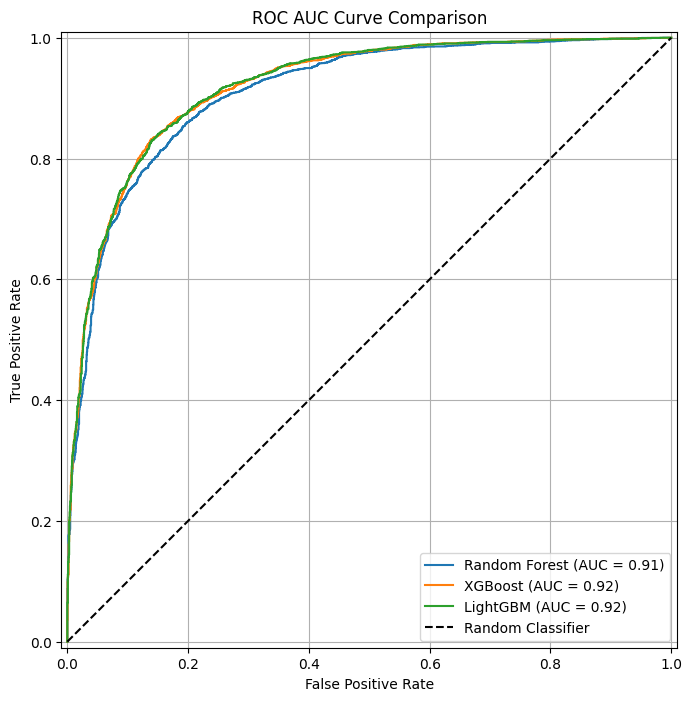

In [56]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Random Forest
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(best_model_rf, X_test, y_test, ax=plt.gca(), name='Random Forest')

# XGBoost
y_pred_proba_xgb = best_model_xgb.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(best_model_xgb, X_test, y_test, ax=plt.gca(), name='XGBoost')

# LightGBM
y_pred_proba_lgbm = best_model_lgbm.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_estimator(best_model_lgbm, X_test, y_test, ax=plt.gca(), name='LightGBM')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [58]:
print("Creating and saving model components...")

encoding_maps = {
    'Gender': Gender,
    'City': City,
    'Sleep_Duration': Sleep_Duration,
    'Dietary_Habits': Dietary_Habits,
    'Degree': Degree,
    'Suicidal_Thoughts': Suicidal_Thoughts,
    'Family_History_of_Mental_Illness': Family_History_of_Mental_Illness
}

best_params = lgbm_search.best_params_

class_ = {
    0: 'No Depression',
    1: 'Depression'
}

model_components = {
    'model': best_model_lgbm,
    'feature_names': X.columns.tolist(),
    'encoding_maps': encoding_maps,
    'model_params': best_params,
    'removed_features': list(corr_features) if len(corr_features) > 0 else [],
    'target_map': class_
}

import joblib
joblib.dump(model_components, 'depression_prediction_model.joblib')
print("Model components saved successfully as 'depression_prediction_model.joblib'")

Creating and saving model components...
Model components saved successfully as 'depression_prediction_model.joblib'


In [59]:
from google.colab import files

files.download('depression_prediction_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>